# 1 (a) Steady state value

After seetting up Lagrange problem, we have first order conditions as

\begin{equation*}
\begin{aligned}
&(c_t-l_t^{2})^{-\sigma} = \lambda_t\\
&(c_t-l_t^{2})^{-\sigma}2l_t = \lambda_t A_t k_t^{\theta} l_t^{-\theta} (1-\theta)\\
&\lambda_t = \lambda_{t+1}\beta[A_{t+1} \theta k_{t+1}^{\theta-1} l_{t+1}^{1-\theta} + (1-\delta)]
\end{aligned}
\end{equation*}

With the FOCs, the steady state capital and labor should satisfy

\begin{equation*}
\begin{aligned}
&A_t \theta (\frac{k^*}{l^*})^{\theta-1} + (1-\delta) = \frac{1}{\beta}\\
&2l^{*}= A_t(\frac{k^*}{l^*})^{\theta} (1-\theta)
\end{aligned}
\end{equation*}

Now let us define capital per capita in steady state as
$$k_l^{s} = \frac{k^{*}}{l^{*}}$$

In [1]:
#define parameter values
beta = 0.99
sigma = 2
theta = 0.3
delta = 0.07
A = 0.6

In [ ]:
# calcuate the optimal capital per capita in ss
k_l_s = captial_per_capita(A, theta, delta, beta)
k_l_s

3.1793256781907986

In [ ]:
#optimal labor used in ss
l_ss = labor(k_l_s, A, theta)
l_ss

0.29711173130702273

In [ ]:
#optimal captial used in ss
k_ss = l_ss * k_l_s
k_ss

0.9446149566361424

***Thus, the steady state value of capital $k_{ss}$ = 0.945  and labor $l_{ss}$ = 0.297***

# 1 (b) Bisection method

In [ ]:
k_0 = 0.75 * k_ss
k_0

0.7084612174771068

In [ ]:
k_2 = 0.85 * k_ss
k_2

0.802922713140721

From 1(a) FOCs, substitue $\lambda_t$(using the marginal utility function) and $c_t$(using our budget constraint) , we know that:
c


\begin{equation*}
\begin{aligned}
&\beta[A_{t+1} \theta k_{t+1}^{\theta-1} l_{t+1}^{1-\theta} + (1-\delta)] = \frac{[A_t k_t^{\theta} l_t^{1-\theta} + k_t(1-\delta) - k_{t+1} - l_t^{2}]^{-\sigma}}{[A_{t+1} k_{t+1}^{\theta} l_{t+1}^{1-\theta}+ k_{t+1}(1-\delta)-k_{t+2}-l_{t+1}^{2}]^{-\sigma}} 
\end{aligned}
\end{equation*}

The first equation gives us a one to one relationship for optimal $k_t$ and $l_t$. Let us first calculate $l_0$

In [2]:
#use the function to solve the optimal capital per capita in ss
def captial_per_capita(A, theta, delta, beta):
    return ((1/beta+delta-1)/(A*theta))**(1/(theta-1))

In [ ]:
#knowing k_l_s, solve the optimal labor in ss
def labor(k_l_s, A, theta):
    return ((1-theta)/2*A*k_l_s**(theta))

In [ ]:
# calculating l_0
def l_function(A, k, theta):
    return ((A * k**(theta) * ((1-theta)/2))**(1/(1+theta)))

In [ ]:
#value of l_0
l_0= l_function(A, k_0, theta)
l_0

0.2780275187715525

***Thus, the value of $l_0$ = 0.278***

Through the first equation, we know:
\begin{equation*}
\begin{aligned}
&l_1= [\frac{A_t k_1^{\theta} (1-\theta)}{2}]^{\frac{1}{(1+\theta)}}
\end{aligned}
\end{equation*}

In [ ]:
#let us using the second equation above to do bisection to find k_1 then again by the first equation we can get l_1
def f_k(k_0, l_0, k1, k_2, beta, theta, delta, sigma):
    A = 0.6  
    l1 = (A * k1**(theta) * (1-theta)/2) ** (1/(1+theta))
    
    return (
        (beta *(A * theta * (k1/l1)**(theta - 1) + 1 - delta)) - 
        ((A * k_0**(theta) * l_0**(1 - theta) + k_0 * (1-delta) - k1 - l_0**2) /
        (A * k1**(theta) * l1**(1 - theta) + k1 * (1-delta) - k_2 - l1**2)) ** (-sigma)
    )

In [ ]:
# track the iterations and time
import time
import pandas as pd

In [ ]:
# define bisection method to find the root
def bisection_method(func, a, b, tol=1e-6, max_iter=1000):
    start_time = time.time()  # Start timing
    iterations = []
    
    for iteration in range(max_iter):
        c = (a + b) / 2  # find the middle point
        f_c = func(c)
        iterations.append({
            'Iteration': iteration + 1,
            'a': a,
            'b': b,
            'c (midpoint)': c,
            'f(c)': f_c,
            'Interval size': b - a
        })
        
        if abs(f_c) < tol or abs(b - a) < tol:  # see if close enough to the root
            end_time = time.time()
            return c, iterations, end_time - start_time
        
        if func(a) * f_c < 0:  # update the interval using c to get closer
            b = c
        else:
            a = c
    
    end_time = time.time()
    return c, iterations, end_time - start_time  # return the root, time and iterations


In [ ]:
# define all parameters
k_0 = 0.7084612174771068
l_0 = 0.2780275187715525
k2 = 0.802922713140721
beta = 0.99
theta = 0.3
delta = 0.07
sigma = 2

# intital guess for k1
a = 0.1
b = 1

f_for_bisection = lambda k1: f_k(k_0, l_0, k1, k2, beta, theta, delta, sigma)

# find the root using the bisection method
root_k1, iteration_data, time_taken = bisection_method(f_for_bisection, a, b)

# create a DataFrame to store iteration data
df_iterations = pd.DataFrame(iteration_data)

# print the table of the results
print(df_iterations)
print(f"\nThe root k1 is: {root_k1}")
print(f"Time taken: {time_taken:.6f} seconds")

    Iteration         a         b  c (midpoint)      f(c)  Interval size
0           1  0.100000  1.000000      0.550000  0.606252   9.000000e-01
1           2  0.550000  1.000000      0.775000 -5.041033   4.500000e-01
2           3  0.550000  0.775000      0.662500  0.900880   2.250000e-01
3           4  0.662500  0.775000      0.718750  0.998204   1.125000e-01
4           5  0.718750  0.775000      0.746875  0.523622   5.625000e-02
5           6  0.746875  0.775000      0.760938 -0.629512   2.812500e-02
6           7  0.746875  0.760938      0.753906  0.113510   1.406250e-02
7           8  0.753906  0.760938      0.757422 -0.201397   7.031250e-03
8           9  0.753906  0.757422      0.755664 -0.032137   3.515625e-03
9          10  0.753906  0.755664      0.754785  0.043395   1.757812e-03
10         11  0.754785  0.755664      0.755225  0.006335   8.789062e-04
11         12  0.755225  0.755664      0.755444 -0.012721   4.394531e-04
12         13  0.755225  0.755444      0.755334 -0.

In [ ]:
# knowing k1, we can find l1
k1 = root_k1
l1 = (A * k1**(theta) * (1-theta)/2) ** (1/(1+theta))
l1

0.2821653543363989

***Thus the table above shows $k_1$  = 0.755 and $l_1$ = 0.282, each iteration and taken time is shown above***

# 1 (c) Newton's method

From 1 (b), we know that:

\begin{equation*}
\begin{aligned}
&f(k) = \beta[A_{t+1} \theta k_{t+1}^{\theta-1} l_{t+1}^{1-\theta} + (1-\delta)] - \frac{[A_t k_t^{\theta} l_t^{1-\theta} + k_t(1-\delta) - k_{t+1} - l_t^{2}]^{-\sigma}}{[A_{t+1} k_{t+1}^{\theta} l_{t+1}^{1-\theta}+ k_{t+1}(1-\delta)-k_{t+2}-l_{t+1}^{2}]^{-\sigma}} 
\end{aligned}
\end{equation*}



In [ ]:


import time

# newton method
def newton_method(func, d_func, x0, tol=1e-5, max_iter=50):
    start_time = time.time()
    x = x0
    iterations = []
    # setting the output table
    print(f"{'Iteration':<10}{'x':<15}{'f(x)':<15}{'f\'(x)':<15}{'x_new':<15}{'Difference':<15}")
    
    for iteration in range(max_iter):
        f_x = func(x)
        df_x = d_func(x)
        
        if df_x == 0:
            print("value error")
            break
        # using the newton method to update value
        x_new = x - f_x / df_x
        difference = abs(x_new - x)
        iterations.append((iteration + 1, x, f_x, df_x, x_new, difference))
        
        print(f"{iteration + 1:<10}{x:<15.10f}{f_x:<15.10f}{df_x:<15.10f}{x_new:<15.10f}{difference:<15.10f}")
        
        if difference < tol:
            end_time = time.time()
            print(f"\nThe root k1 is: {x_new}")
            print(f"Time taken: {end_time - start_time:.6f} seconds")
            return x_new, iterations, end_time - start_time
        
        x = x_new
    
    end_time = time.time()
    print(f"\nThe root k1 is: {x_new}")
    print(f"Time taken: {end_time - start_time:.6f} seconds")
    return x, iterations, end_time - start_time
#def df_k
def df_k(k_0, l_0, k1, k_2, beta, theta, delta, sigma):
    # Numerical approximation of the derivative (finite differences)
    h = 1e-5
    return (f_k(k_0, l_0, k1 + h, k_2, beta, theta, delta, sigma) - f_k(k_0, l_0, k1 - h, k_2, beta, theta, delta, sigma)) / (2 * h)
df_for_newton = lambda k1: df_k(k_0, l_0, k1, k2, beta, theta, delta, sigma)
# output
root_k1_newton, iteration_data_newton, time_taken_newton = newton_method(f_for_bisection, df_for_newton, 0.75)


Iteration x              f(x)           f'(x)          x_new          Difference     
1         0.7500000000   0.3699229843   -55.6673391260 0.7566452428   0.0066452428   
2         0.7566452428   -0.1234405196  -97.0389220726 0.7553731706   0.0012720722   
3         0.7553731706   -0.0065100828  -87.0093460916 0.7552983501   0.0000748205   
4         0.7552983501   -0.0000206945  -86.4568524657 0.7552981107   0.0000002394   

The root k1 is: 0.7552981106888004
Time taken: 0.001766 seconds


***Thus we get the same result for $k_1$ and $l_1$, each iteration and taken time is shown above***

# 1 (d) Paths (Shooting method)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

From above, we know that:

\begin{equation*}
\begin{aligned}
&f(k) = \beta[A \theta k_{t+1}^{\theta-1} l_{t+1}^{1-\theta} + (1-\delta)] - \frac{[A k_t^{\theta} l_t^{1-\theta} + k_t(1-\delta) - k_{t+1} - l_t^{2}]^{-\sigma}}{[A k_{t+1}^{\theta} l_{t+1}^{1-\theta}+ k_{t+1}(1-\delta)-k_{t+2}-l_{t+1}^{2}]^{-\sigma}} 
\end{aligned}
\end{equation*}
\begin{equation*}
\begin{aligned}
&l_t= [\frac{A k_t^{\theta} (1-\theta)}{2}]^{\frac{1}{(1+\theta)}}
\end{aligned}
\end{equation*}

In [ ]:
k_ss = 0.9446149566361424
k_0 = 0.7084612174771068
l_0 = 0.2780275187715525
beta = 0.99
theta = 0.3
delta = 0.07
A = 0.6
sigma = 2
t = 150

In [ ]:
# define labor fucntion, so we can calculate l_t knowing k_t
def labor(A, k_0, theta):
    return((A * k_0**(theta) * (1-theta)/2) ** (1/(1+theta)))

In [ ]:
# define k_t+1
def capital_next(k_0, c_0, A, theta, delta):
    l = labor(A, k_0, theta)
    return(A * k_0**(theta) * l**(1-theta) + k_0 * (1-delta) - c_0)

In [ ]:
#define c_t+1
def consumption_next(k_0, k_1, c_0, A, theta, delta, sigma, beta):
    # l_temp = labor(A, k_0, theta)
    MU_0 = (c_0 - (labor(A, k_0, theta))**(2))**(-sigma)
    c_1 = (MU_0 / (beta*(A * theta*k_1**(theta-1) * (labor(A, k_0, theta))**(1-theta)+(1-delta))))**(-1/sigma) + (labor(A, k_0, theta))**(2)
    return c_1

In [ ]:
# def the c_t and k_t path
def consumpation_path(c0,t,A,theta, delta, sigma, beta):
    k=np.zeros((t+1, 1))
    c=np.zeros((t+1, 1))
    k[0]=k_0
    c[0]=c0
    for i in range(t):
        k[i+1]=capital_next(k[i], c[i], A, theta, delta)
        if k[i+1]<=0:
            k[i+1]=0
            break
        c[i+1]=consumption_next(k[i], k[i+1], c[i], A, theta, delta, sigma, beta)
    result=np.hstack((k, c))
    return(result)

In [ ]:
k_upper  = 2
# upperbound consmpution to find the k_gold
def css(k_0,theta,delta):
    l = labor(A, k_0, theta)
    return(A*k_0**(theta)* l**(1-theta) - delta * k_0)
# find the k_gold : dc_ss/dk_ss  = 0 and subsitute l
k_gold = (delta * (1+theta)/(2*theta) * (1/A))**((1+theta)/(theta-1)) * A*(1-theta)/2
c_max = css(k_gold,theta,delta)
c_max

0.22052779027015987

In [ ]:
# define shooting path
def optimal_path(t,c_max,A,k_ss,theta, delta, sigma, beta,c0_min=0.001):
    c0_max=c_max
    ite=0
    time = np.arange(0,t+1,1)
    while c0_max-c0_min>1e-16:
        c0=(c0_min+c0_max)/2
        simulation=consumpation_path(c0,t,A,theta, delta, sigma, beta)
        if simulation[len(simulation)-1,0]<=k_ss:
            c0_max=c0
        else:
            c0_min=c0
        ite+=1
    return simulation

In [ ]:
k_sq = optimal_path(t,c_max,A,k_ss,theta, delta, sigma, beta,c0_min=0.001)[:,0]
k_sq

array([0.70846122, 0.71429559, 0.71999882, 0.72557313, 0.73102074,
       0.73634387, 0.74154476, 0.74662564, 0.75158872, 0.75643621,
       0.76117032, 0.76579324, 0.77030714, 0.77471418, 0.77901649,
       0.7832162 , 0.78731541, 0.79131619, 0.79522058, 0.79903063,
       0.80274833, 0.80637565, 0.80991454, 0.81336693, 0.8167347 ,
       0.82001972, 0.82322382, 0.82634881, 0.82939646, 0.83236852,
       0.8352667 , 0.83809269, 0.84084814, 0.84353469, 0.84615392,
       0.8487074 , 0.85119667, 0.85362324, 0.85598858, 0.85829414,
       0.86054134, 0.86273157, 0.8648662 , 0.86694655, 0.86897394,
       0.87094965, 0.87287493, 0.87475099, 0.87657905, 0.87836028,
       0.88009583, 0.88178681, 0.88343432, 0.88503945, 0.88660324,
       0.88812671, 0.88961087, 0.89105669, 0.89246515, 0.89383717,
       0.89517366, 0.89647553, 0.89774364, 0.89897885, 0.90018199,
       0.90135387, 0.90249528, 0.90360701, 0.9046898 , 0.90574441,
       0.90677154, 0.90777191, 0.90874621, 0.9096951 , 0.91061

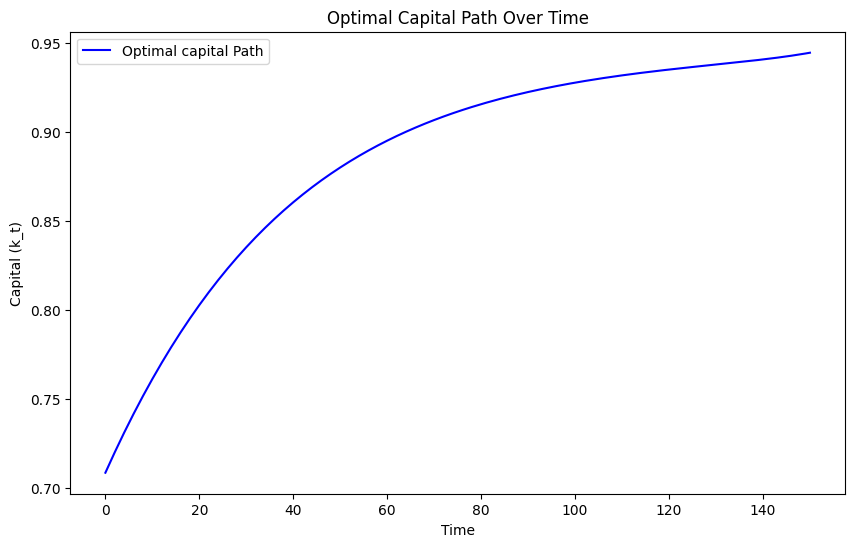

In [ ]:
# plot the optimal capital
time = np.arange(0, t+1)
plt.figure(figsize=(10, 6))
plt.plot(time, k_sq, color='blue', label='Optimal capital Path')
plt.xlabel('Time')
plt.ylabel('Capital (k_t)')
plt.title('Optimal Capital Path Over Time')
plt.legend()
plt.show()

In [ ]:
# def the optimal labor used path
def optimal_labor(A, k_sq, theta):
    l_sq = np.zeros_like(k_sq)
    for i in range(len(l_sq)):
        l_sq[i] = labor(A, k_sq[i], theta)
    return l_sq

In [ ]:
l_sq = optimal_labor(A, k_sq, theta)
l_sq

array([0.27802752, 0.27855423, 0.27906591, 0.27956303, 0.28004601,
       0.28051529, 0.28097128, 0.28141438, 0.28184497, 0.28226342,
       0.28267011, 0.28306536, 0.28344953, 0.28382294, 0.2841859 ,
       0.28453872, 0.2848817 , 0.28521512, 0.28553926, 0.28585439,
       0.28616077, 0.28645865, 0.28674827, 0.28702988, 0.28730371,
       0.28756997, 0.28782888, 0.28808065, 0.28832549, 0.28856359,
       0.28879514, 0.28902033, 0.28923934, 0.28945234, 0.2896595 ,
       0.28986098, 0.29005696, 0.29024757, 0.29043297, 0.2906133 ,
       0.29078872, 0.29095934, 0.29112532, 0.29128677, 0.29144383,
       0.29159661, 0.29174523, 0.29188982, 0.29203047, 0.29216731,
       0.29230043, 0.29242993, 0.29255593, 0.29267851, 0.29279777,
       0.2929138 , 0.29302668, 0.29313651, 0.29324338, 0.29334735,
       0.29344851, 0.29354694, 0.29364271, 0.2937359 , 0.29382657,
       0.2939148 , 0.29400065, 0.29408419, 0.29416547, 0.29424457,
       0.29432154, 0.29439644, 0.29446932, 0.29454025, 0.29460

# 1 (e) 

In [ ]:
# def output y 
def output_function(A, k_sq, l_sq, theta):
    y_sq = np.zeros_like(k_sq)
    for i in range(len(l_sq)):
        y_sq[i] = A * (k_sq[i])**(theta) * (l_sq[i])**(1-theta)
    return y_sq

In [ ]:
y_sq = output_function(A, k_sq, l_sq, theta)
y_sq

array([0.22085515, 0.22169274, 0.22250795, 0.22330139, 0.22407362,
       0.22482522, 0.22555674, 0.22626872, 0.22696167, 0.22763612,
       0.22829254, 0.22893143, 0.22955325, 0.23015846, 0.23074751,
       0.23132082, 0.23187881, 0.2324219 , 0.23295048, 0.23346495,
       0.23396567, 0.23445302, 0.23492735, 0.23538901, 0.23583834,
       0.23627567, 0.23670132, 0.2371156 , 0.23751882, 0.23791127,
       0.23829324, 0.238665  , 0.23902684, 0.23937902, 0.23972179,
       0.2400554 , 0.24038011, 0.24069614, 0.24100374, 0.24130312,
       0.24159451, 0.24187811, 0.24215415, 0.24242281, 0.2426843 ,
       0.24293881, 0.24318652, 0.24342762, 0.24366228, 0.24389067,
       0.24411297, 0.24432933, 0.24453992, 0.24474488, 0.24494438,
       0.24513855, 0.24532753, 0.24551148, 0.24569051, 0.24586476,
       0.24603437, 0.24619945, 0.24636012, 0.24651651, 0.24666873,
       0.24681689, 0.24696109, 0.24710145, 0.24723807, 0.24737105,
       0.24750048, 0.24762647, 0.24774909, 0.24786846, 0.24798

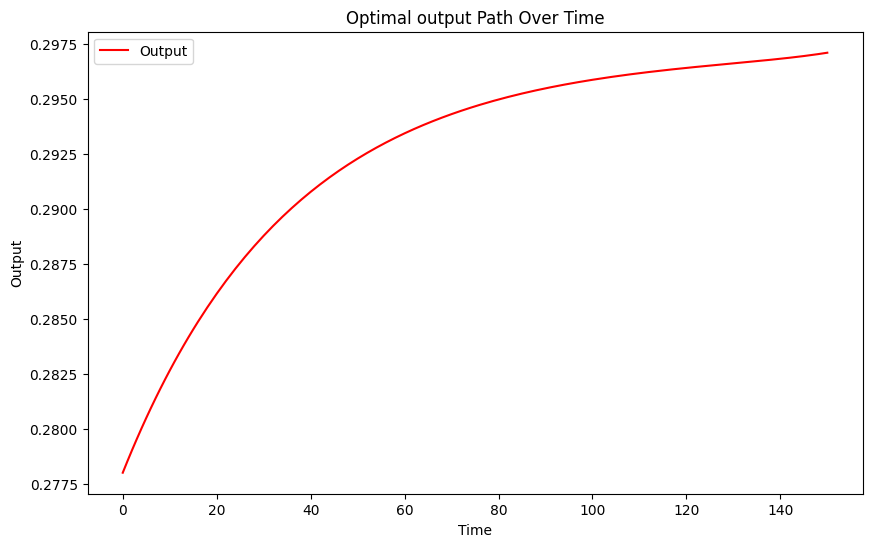

In [ ]:
# plot y 
time = np.arange(0, t+1)
plt.figure(figsize=(10, 6))
plt.plot(time, l_sq, color='red', label='Output')
plt.xlabel('Time')
plt.ylabel('Output')
plt.title('Optimal output Path Over Time')
plt.legend()
plt.show()

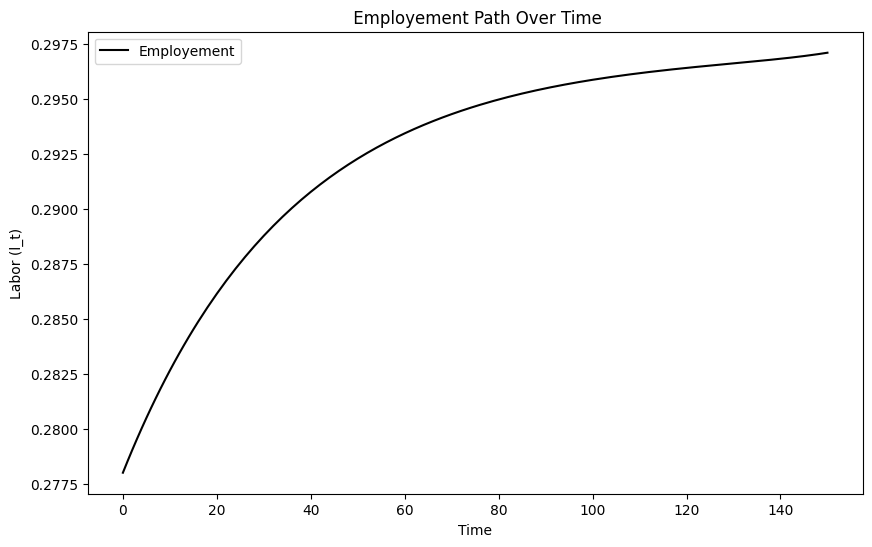

In [ ]:
# plot the employment
time = np.arange(0, t+1)
plt.figure(figsize=(10, 6))
plt.plot(time, l_sq, color='black', label='Employement')
plt.xlabel('Time')
plt.ylabel('Labor (l_t)')
plt.title(' Employement Path Over Time')
plt.legend()
plt.show()

In [ ]:
#def investment X
def investment_function(k_sq, delta):
    t = len(k_sq) - 1
    x_sq = np.zeros_like(k_sq)
    for i in range(t):
        x_sq[i] = k_sq[i+1] - (1-delta)*k_sq[i]
    return x_sq
x_sq = investment_function(k_sq, delta)
x_sq

array([0.05542666, 0.05570392, 0.05597422, 0.05623773, 0.05649459,
       0.05674496, 0.05698901, 0.05722687, 0.0574587 , 0.05768465,
       0.05790484, 0.05811943, 0.05832854, 0.05853231, 0.05873087,
       0.05892434, 0.05911286, 0.05929653, 0.05947549, 0.05964984,
       0.0598197 , 0.05998519, 0.0601464 , 0.06030346, 0.06045645,
       0.06060548, 0.06075066, 0.06089207, 0.06102981, 0.06116398,
       0.06129466, 0.06142194, 0.06154591, 0.06166666, 0.06178426,
       0.06189879, 0.06201033, 0.06211897, 0.06222476, 0.06232779,
       0.06242813, 0.06252584, 0.06262099, 0.06271365, 0.06280388,
       0.06289175, 0.06297731, 0.06306063, 0.06314176, 0.06322076,
       0.06329769, 0.06337259, 0.06344553, 0.06351655, 0.0635857 ,
       0.06365303, 0.06371859, 0.06378242, 0.06384458, 0.0639051 ,
       0.06396402, 0.0640214 , 0.06407726, 0.06413166, 0.06418462,
       0.06423619, 0.0642864 , 0.06433529, 0.06438289, 0.06442924,
       0.06447438, 0.06451833, 0.06456112, 0.0646028 , 0.06464

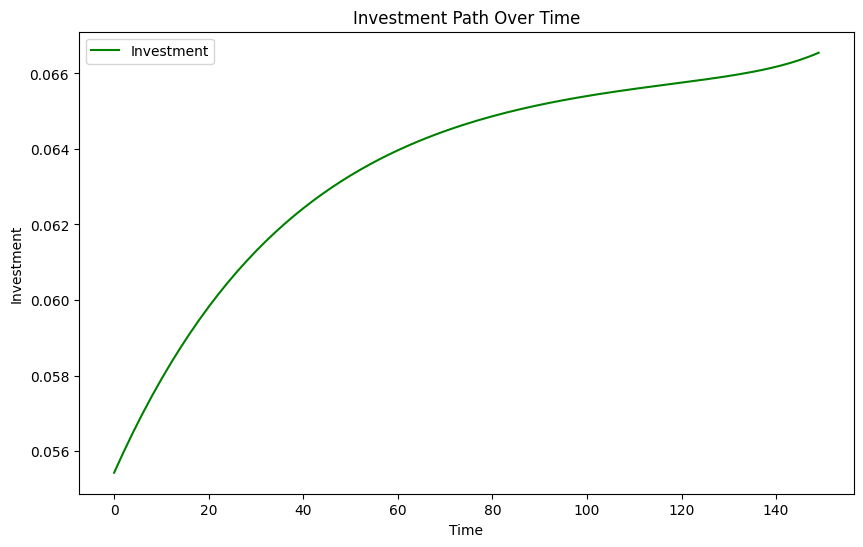

In [ ]:
# plot the investment
time = np.arange(0, 150)
plt.figure(figsize=(10, 6))
plt.plot(time, x_sq[:-1], color='green', label='Investment')
plt.xlabel('Time')
plt.ylabel('Investment')
plt.title('Investment Path Over Time')
plt.legend()
plt.show()

In [ ]:
# def the consumption path
def consumption_function(A, l_sq, k_sq, theta, delta):
    c_sq = np.zeros_like(k_sq)
    for i in range(t):
        c_sq[i] = A*(k_sq[i])**(theta)*(l_sq[i])**(1-theta) + (1-delta)*k_sq[i] - k_sq[i+1]
    return c_sq
c_sq = consumption_function(A, l_sq, k_sq, theta, delta)

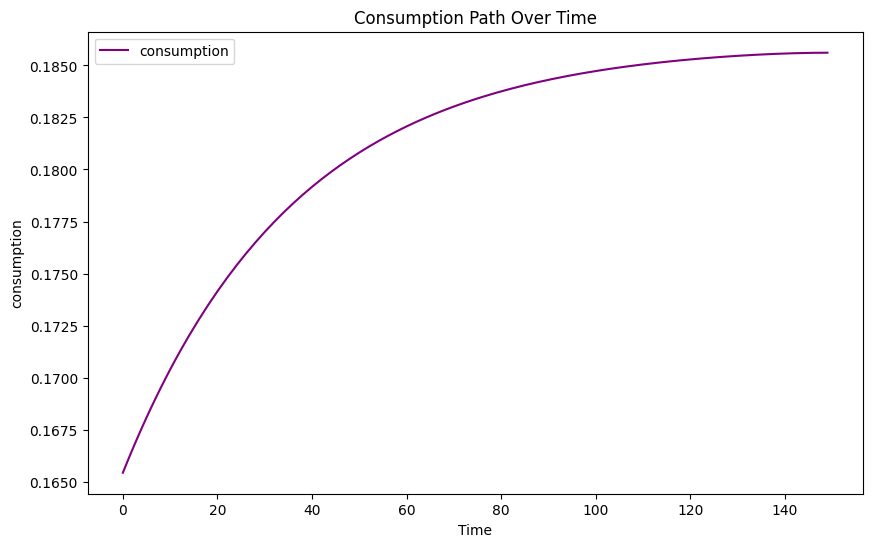

In [ ]:
# plot the consumption
time = np.arange(0, 150)
plt.figure(figsize=(10, 6))
plt.plot(time, c_sq[:-1], color='purple', label='consumption')
plt.xlabel('Time')
plt.ylabel('consumption')
plt.title('Consumption Path Over Time')
plt.legend()
plt.show()

In [ ]:
# def the interest rate path
def interest_function(A, l_sq, k_sq, theta, delta):
    r_sq = np.zeros_like(k_sq)
    for i in range(t+1):
        r_sq[i] = A*theta*(k_sq[i])**(theta-1)*(l_sq[i])**(1-theta) - delta
    return r_sq
r_sq = interest_function(A, l_sq, k_sq,theta, delta)
r_sq

array([0.02352177, 0.02310966, 0.0227118 , 0.02232759, 0.02195647,
       0.02159792, 0.02125143, 0.02091653, 0.02059277, 0.0202797 ,
       0.01997692, 0.01968404, 0.01940067, 0.01912647, 0.01886109,
       0.0186042 , 0.0183555 , 0.01811468, 0.01788146, 0.01765557,
       0.01743674, 0.01722474, 0.01701931, 0.01682023, 0.01662728,
       0.01644024, 0.01625892, 0.01608312, 0.01591265, 0.01574733,
       0.015587  , 0.01543148, 0.01528062, 0.01513426, 0.01499226,
       0.01485447, 0.01472076, 0.014591  , 0.01446505, 0.01434281,
       0.01422414, 0.01410894, 0.01399709, 0.0138885 , 0.01378305,
       0.01368066, 0.01358122, 0.01348465, 0.01339086, 0.01329976,
       0.01321127, 0.01312531, 0.0130418 , 0.01296067, 0.01288185,
       0.01280526, 0.01273085, 0.01265854, 0.01258827, 0.01251998,
       0.01245362, 0.01238912, 0.01232644, 0.01226551, 0.01220629,
       0.01214872, 0.01209276, 0.01203836, 0.01198547, 0.01193406,
       0.01188407, 0.01183547, 0.01178821, 0.01174226, 0.01169

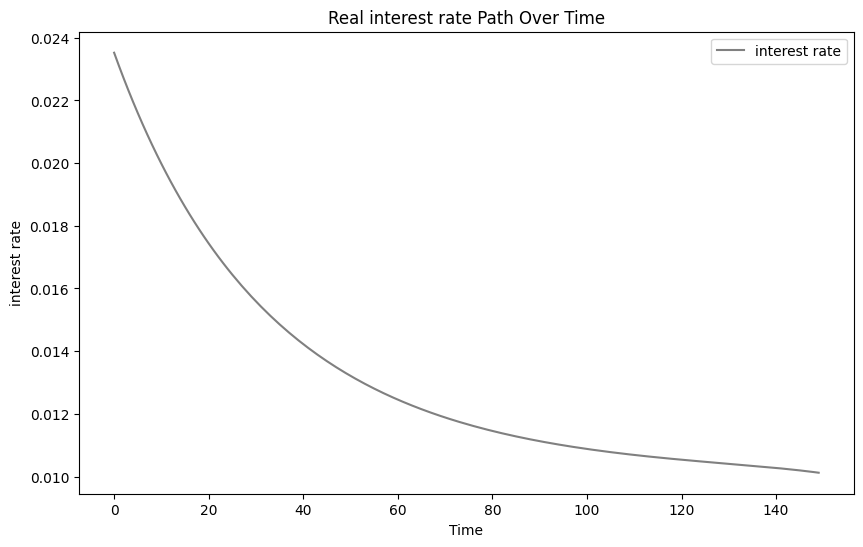

In [ ]:
# plot the interest rate
time = np.arange(0, t)
plt.figure(figsize=(10, 6))
plt.plot(time, r_sq[:-1], color='grey', label='interest rate')
plt.xlabel('Time')
plt.ylabel('interest rate')
plt.title('Real interest rate Path Over Time')
plt.legend()
plt.show()

# 2 (a) Optimal paths with Productivity shocks

In [ ]:
# define parameters
k_ss = 0.9446149566361424
k_0 = k_ss
beta = 0.99
theta = 0.3
delta = 0.07
A_initial = 0.6
sigma = 2
t1 = 50

In [ ]:
# let us first define A_t function
def A_sq_function(t):
    A = [0.6]  # A[0] = 0.6
    for i in range(1, t1 + 1):
        if i <= 13:
            A_i = A[i - 1] + 0.035 - 0.08 * (1 / np.sqrt(i))
        else:
            A_i = 0.6
        A.append(A_i)
    
    return A

In [ ]:
#use the function to solve the optimal capital per capita in ss
def captial_per_capita(A, theta, delta, beta):
    return ((1/beta+delta-1)/(A*theta))**(1/(theta-1))

In [ ]:
# calcuate the optimal capital per capita in ss
k_l_s = captial_per_capita(A, theta, delta, beta)
k_l_s

3.1793256781907986

In [ ]:
#knowing k_l_s, solve the optimal labor in ss
def labor(k_l_s, A, theta):
    return ((1-theta)/2*A*k_l_s**(theta))

In [ ]:
#optimal labor used in ss
l_ss = labor(k_l_s, A, theta)
l_ss

0.29711173130702273

In [ ]:
#optimal captial used in ss
k_ss = l_ss * k_l_s
k_ss

0.9446149566361424

***Thus, the steady state value of capital $k_{ss}$ = 0.945  and labor $l_{ss}$ = 0.297***

In [ ]:
k_0 = 0.75 * k_ss
k_0

0.7084612174771068

In [ ]:
k_2 = 0.85 * k_ss
k_2

0.802922713140721

From 1(a) FOCs, substitue $\lambda_t$(using the marginal utility function) and $c_t$(using our budget constraint) , we know that:
c


\begin{equation*}
\begin{aligned}
&\beta[A_{t+1} \theta k_{t+1}^{\theta-1} l_{t+1}^{1-\theta} + (1-\delta)] = \frac{[A_t k_t^{\theta} l_t^{1-\theta} + k_t(1-\delta) - k_{t+1} - l_t^{2}]^{-\sigma}}{[A_{t+1} k_{t+1}^{\theta} l_{t+1}^{1-\theta}+ k_{t+1}(1-\delta)-k_{t+2}-l_{t+1}^{2}]^{-\sigma}} 
\end{aligned}
\end{equation*}

The first equation gives us a one to one relationship for optimal $k_t$ and $l_t$. Let us first calculate $l_0$

In [ ]:
# calculating l_0
def l_function(A, k, theta):
    return ((A * k**(theta) * ((1-theta)/2))**(1/(1+theta)))

In [ ]:
#value of l_0
l_0= l_function(A, k_0, theta)
l_0

0.2780275187715525

***Thus, the value of $l_0$ = 0.278***

Through the first equation, we know:
\begin{equation*}
\begin{aligned}
&l_1= [\frac{A_t k_1^{\theta} (1-\theta)}{2}]^{\frac{1}{(1+\theta)}}
\end{aligned}
\end{equation*}

In [ ]:
#let us using the second equation above to do bisection to find k_1 then again by the first equation we can get l_1
def f_k(k_0, l_0, k1, k_2, beta, theta, delta, sigma):
    A = 0.6  
    l1 = (A * k1**(theta) * (1-theta)/2) ** (1/(1+theta))
    
    return (
        (beta *(A * theta * (k1/l1)**(theta - 1) + 1 - delta)) - 
        ((A * k_0**(theta) * l_0**(1 - theta) + k_0 * (1-delta) - k1 - l_0**2) /
        (A * k1**(theta) * l1**(1 - theta) + k1 * (1-delta) - k_2 - l1**2)) ** (-sigma)
    )

In [ ]:
# track the iterations and time
import time
import pandas as pd

In [ ]:
# define bisection method to find the root
def bisection_method(func, a, b, tol=1e-6, max_iter=1000):
    start_time = time.time()  # Start timing
    iterations = []
    
    for iteration in range(max_iter):
        c = (a + b) / 2  # find the middle point
        f_c = func(c)
        iterations.append({
            'Iteration': iteration + 1,
            'a': a,
            'b': b,
            'c (midpoint)': c,
            'f(c)': f_c,
            'Interval size': b - a
        })
        
        if abs(f_c) < tol or abs(b - a) < tol:  # see if close enough to the root
            end_time = time.time()
            return c, iterations, end_time - start_time
        
        if func(a) * f_c < 0:  # update the interval using c to get closer
            b = c
        else:
            a = c
    
    end_time = time.time()
    return c, iterations, end_time - start_time  # return the root, time and iterations


In [ ]:
# define all parameters
k_0 = 0.7084612174771068
l_0 = 0.2780275187715525
k2 = 0.802922713140721
beta = 0.99
theta = 0.3
delta = 0.07
sigma = 2

# intital guess for k1
a = 0.1
b = 1

f_for_bisection = lambda k1: f_k(k_0, l_0, k1, k2, beta, theta, delta, sigma)

# find the root using the bisection method
root_k1, iteration_data, time_taken = bisection_method(f_for_bisection, a, b)

# create a DataFrame to store iteration data
df_iterations = pd.DataFrame(iteration_data)

# print the table of the results
print(df_iterations)
print(f"\nThe root k1 is: {root_k1}")
print(f"Time taken: {time_taken:.6f} seconds")

    Iteration         a         b  c (midpoint)      f(c)  Interval size
0           1  0.100000  1.000000      0.550000  0.606252   9.000000e-01
1           2  0.550000  1.000000      0.775000 -5.041033   4.500000e-01
2           3  0.550000  0.775000      0.662500  0.900880   2.250000e-01
3           4  0.662500  0.775000      0.718750  0.998204   1.125000e-01
4           5  0.718750  0.775000      0.746875  0.523622   5.625000e-02
5           6  0.746875  0.775000      0.760938 -0.629512   2.812500e-02
6           7  0.746875  0.760938      0.753906  0.113510   1.406250e-02
7           8  0.753906  0.760938      0.757422 -0.201397   7.031250e-03
8           9  0.753906  0.757422      0.755664 -0.032137   3.515625e-03
9          10  0.753906  0.755664      0.754785  0.043395   1.757812e-03
10         11  0.754785  0.755664      0.755225  0.006335   8.789062e-04
11         12  0.755225  0.755664      0.755444 -0.012721   4.394531e-04
12         13  0.755225  0.755444      0.755334 -0.

In [ ]:
# knowing k1, we can find l1
k1 = root_k1
l1 = (A * k1**(theta) * (1-theta)/2) ** (1/(1+theta))
l1

0.2821653543363989

***Thus the table above shows $k_1$  = 0.755 and $l_1$ = 0.282, each iteration and taken time is shown above***

From 1 (b), we know that:

\begin{equation*}
\begin{aligned}
&f(k) = \beta[A_{t+1} \theta k_{t+1}^{\theta-1} l_{t+1}^{1-\theta} + (1-\delta)] - \frac{[A_t k_t^{\theta} l_t^{1-\theta} + k_t(1-\delta) - k_{t+1} - l_t^{2}]^{-\sigma}}{[A_{t+1} k_{t+1}^{\theta} l_{t+1}^{1-\theta}+ k_{t+1}(1-\delta)-k_{t+2}-l_{t+1}^{2}]^{-\sigma}} 
\end{aligned}
\end{equation*}



In [ ]:
import time

import time

# newton method
def newton_method(func, d_func, x0, tol=1e-5, max_iter=50):
    start_time = time.time()
    x = x0
    iterations = []
    # setting the output table
    print(f"{'Iteration':<10}{'x':<15}{'f(x)':<15}{'f\'(x)':<15}{'x_new':<15}{'Difference':<15}")
    
    for iteration in range(max_iter):
        f_x = func(x)
        df_x = d_func(x)
        
        if df_x == 0:
            print("value error")
            break
        # using the newton method to update value
        x_new = x - f_x / df_x
        difference = abs(x_new - x)
        iterations.append((iteration + 1, x, f_x, df_x, x_new, difference))
        
        print(f"{iteration + 1:<10}{x:<15.10f}{f_x:<15.10f}{df_x:<15.10f}{x_new:<15.10f}{difference:<15.10f}")
        
        if difference < tol:
            end_time = time.time()
            print(f"\nThe root k1 is: {x_new}")
            print(f"Time taken: {end_time - start_time:.6f} seconds")
            return x_new, iterations, end_time - start_time
        
        x = x_new
    
    end_time = time.time()
    print(f"\nThe root k1 is: {x_new}")
    print(f"Time taken: {end_time - start_time:.6f} seconds")
    return x, iterations, end_time - start_time
#def df_k
def df_k(k_0, l_0, k1, k_2, beta, theta, delta, sigma):
    # Numerical approximation of the derivative (finite differences)
    h = 1e-5
    return (f_k(k_0, l_0, k1 + h, k_2, beta, theta, delta, sigma) - f_k(k_0, l_0, k1 - h, k_2, beta, theta, delta, sigma)) / (2 * h)
df_for_newton = lambda k1: df_k(k_0, l_0, k1, k2, beta, theta, delta, sigma)
# output
root_k1_newton, iteration_data_newton, time_taken_newton = newton_method(f_for_bisection, df_for_newton, 0.75)


Iteration x              f(x)           f'(x)          x_new          Difference     
1         0.7500000000   0.3699229843   -55.6673391260 0.7566452428   0.0066452428   
2         0.7566452428   -0.1234405196  -97.0389220726 0.7553731706   0.0012720722   
3         0.7553731706   -0.0065100828  -87.0093460916 0.7552983501   0.0000748205   
4         0.7552983501   -0.0000206945  -86.4568524657 0.7552981107   0.0000002394   

The root k1 is: 0.7552981106888004
Time taken: 0.000644 seconds


***Thus we get the same result for $k_1$ and $l_1$, each iteration and taken time is shown above***

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

From above, we know that:

\begin{equation*}
\begin{aligned}
&f(k) = \beta[A \theta k_{t+1}^{\theta-1} l_{t+1}^{1-\theta} + (1-\delta)] - \frac{[A k_t^{\theta} l_t^{1-\theta} + k_t(1-\delta) - k_{t+1} - l_t^{2}]^{-\sigma}}{[A k_{t+1}^{\theta} l_{t+1}^{1-\theta}+ k_{t+1}(1-\delta)-k_{t+2}-l_{t+1}^{2}]^{-\sigma}} 
\end{aligned}
\end{equation*}
\begin{equation*}
\begin{aligned}
&l_t= [\frac{A k_t^{\theta} (1-\theta)}{2}]^{\frac{1}{(1+\theta)}}
\end{aligned}
\end{equation*}

In [ ]:
k_ss = 0.9446149566361424
k_0 = 0.7084612174771068
l_0 = 0.2780275187715525
beta = 0.99
theta = 0.3
delta = 0.07
A = 0.6
sigma = 2
t = 150

In [ ]:
# define labor fucntion, so we can calculate l_t knowing k_t
def labor(A, k_0, theta):
    return((A * k_0**(theta) * (1-theta)/2) ** (1/(1+theta)))

In [ ]:
# define k_t+1
def capital_next(k_0, c_0, A, theta, delta):
    l = labor(A, k_0, theta)
    return(A * k_0**(theta) * l**(1-theta) + k_0 * (1-delta) - c_0)

In [ ]:
#define c_t+1
def consumption_next(k_0, k_1, c_0, A, theta, delta, sigma, beta):
    # l_temp = labor(A, k_0, theta)
    MU_0 = (c_0 - (labor(A, k_0, theta))**(2))**(-sigma)
    c_1 = (MU_0 / (beta*(A * theta*k_1**(theta-1) * (labor(A, k_0, theta))**(1-theta)+(1-delta))))**(-1/sigma) + (labor(A, k_0, theta))**(2)
    return c_1

In [ ]:
# def the c_t and k_t path
def consumpation_path(c0,t,A,theta, delta, sigma, beta):
    k=np.zeros((t+1, 1))
    c=np.zeros((t+1, 1))
    k[0]=k_0
    c[0]=c0
    for i in range(t):
        k[i+1]=capital_next(k[i], c[i], A, theta, delta)
        if k[i+1]<=0:
            k[i+1]=0
            break
        c[i+1]=consumption_next(k[i], k[i+1], c[i], A, theta, delta, sigma, beta)
    result=np.hstack((k, c))
    return(result)

In [ ]:
k_upper  = 2
# upperbound consmpution to find the k_gold
def css(k_0,theta,delta):
    l = labor(A, k_0, theta)
    return(A*k_0**(theta)* l**(1-theta) - delta * k_0)
# find the k_gold : dc_ss/dk_ss  = 0 and subsitute l
k_gold = (delta * (1+theta)/(2*theta) * (1/A))**((1+theta)/(theta-1)) * A*(1-theta)/2
c_max = css(k_gold,theta,delta)
c_max

0.22052779027015987

In [ ]:
# define shooting path
def optimal_path(t,c_max,A,k_ss,theta, delta, sigma, beta,c0_min=0.001):
    c0_max=c_max
    ite=0
    time = np.arange(0,t+1,1)
    while c0_max-c0_min>1e-16:
        c0=(c0_min+c0_max)/2
        simulation=consumpation_path(c0,t,A,theta, delta, sigma, beta)
        if simulation[len(simulation)-1,0]<=k_ss:
            c0_max=c0
        else:
            c0_min=c0
        ite+=1
    return simulation

In [ ]:
k_sq = optimal_path(t,c_max,A,k_ss,theta, delta, sigma, beta,c0_min=0.001)[:,0]
k_sq

array([0.70846122, 0.71429559, 0.71999882, 0.72557313, 0.73102074,
       0.73634387, 0.74154476, 0.74662564, 0.75158872, 0.75643621,
       0.76117032, 0.76579324, 0.77030714, 0.77471418, 0.77901649,
       0.7832162 , 0.78731541, 0.79131619, 0.79522058, 0.79903063,
       0.80274833, 0.80637565, 0.80991454, 0.81336693, 0.8167347 ,
       0.82001972, 0.82322382, 0.82634881, 0.82939646, 0.83236852,
       0.8352667 , 0.83809269, 0.84084814, 0.84353469, 0.84615392,
       0.8487074 , 0.85119667, 0.85362324, 0.85598858, 0.85829414,
       0.86054134, 0.86273157, 0.8648662 , 0.86694655, 0.86897394,
       0.87094965, 0.87287493, 0.87475099, 0.87657905, 0.87836028,
       0.88009583, 0.88178681, 0.88343432, 0.88503945, 0.88660324,
       0.88812671, 0.88961087, 0.89105669, 0.89246515, 0.89383717,
       0.89517366, 0.89647553, 0.89774364, 0.89897885, 0.90018199,
       0.90135387, 0.90249528, 0.90360701, 0.9046898 , 0.90574441,
       0.90677154, 0.90777191, 0.90874621, 0.9096951 , 0.91061

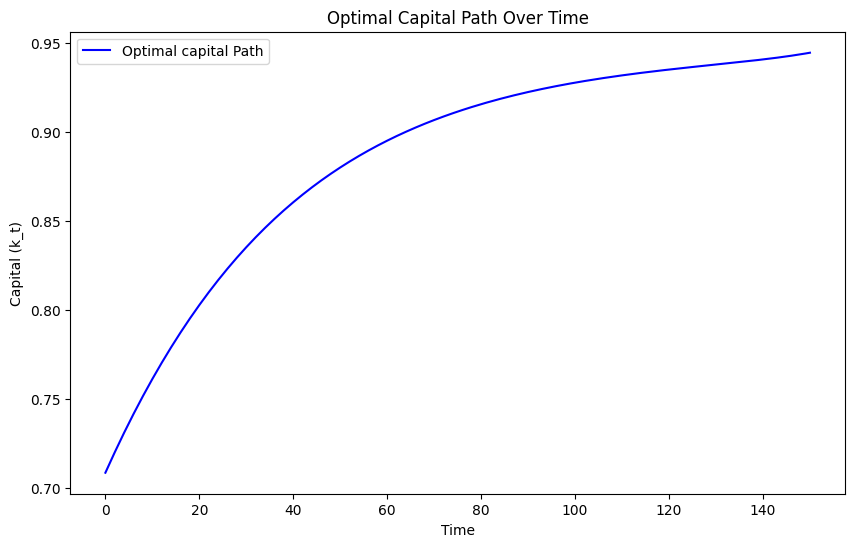

In [ ]:
# plot the optimal capital
time = np.arange(0, t+1)
plt.figure(figsize=(10, 6))
plt.plot(time, k_sq, color='blue', label='Optimal capital Path')
plt.xlabel('Time')
plt.ylabel('Capital (k_t)')
plt.title('Optimal Capital Path Over Time')
plt.legend()
plt.show()

In [ ]:
# def the optimal labor used path
def optimal_labor(A, k_sq, theta):
    l_sq = np.zeros_like(k_sq)
    for i in range(len(l_sq)):
        l_sq[i] = labor(A, k_sq[i], theta)
    return l_sq

In [ ]:
l_sq = optimal_labor(A, k_sq, theta)
l_sq

array([0.27802752, 0.27855423, 0.27906591, 0.27956303, 0.28004601,
       0.28051529, 0.28097128, 0.28141438, 0.28184497, 0.28226342,
       0.28267011, 0.28306536, 0.28344953, 0.28382294, 0.2841859 ,
       0.28453872, 0.2848817 , 0.28521512, 0.28553926, 0.28585439,
       0.28616077, 0.28645865, 0.28674827, 0.28702988, 0.28730371,
       0.28756997, 0.28782888, 0.28808065, 0.28832549, 0.28856359,
       0.28879514, 0.28902033, 0.28923934, 0.28945234, 0.2896595 ,
       0.28986098, 0.29005696, 0.29024757, 0.29043297, 0.2906133 ,
       0.29078872, 0.29095934, 0.29112532, 0.29128677, 0.29144383,
       0.29159661, 0.29174523, 0.29188982, 0.29203047, 0.29216731,
       0.29230043, 0.29242993, 0.29255593, 0.29267851, 0.29279777,
       0.2929138 , 0.29302668, 0.29313651, 0.29324338, 0.29334735,
       0.29344851, 0.29354694, 0.29364271, 0.2937359 , 0.29382657,
       0.2939148 , 0.29400065, 0.29408419, 0.29416547, 0.29424457,
       0.29432154, 0.29439644, 0.29446932, 0.29454025, 0.29460

In [ ]:
# def output y 
def output_function(A, k_sq, l_sq, theta):
    y_sq = np.zeros_like(k_sq)
    for i in range(len(l_sq)):
        y_sq[i] = A * (k_sq[i])**(theta) * (l_sq[i])**(1-theta)
    return y_sq

In [ ]:
y_sq = output_function(A, k_sq, l_sq, theta)
y_sq

array([0.22085515, 0.22169274, 0.22250795, 0.22330139, 0.22407362,
       0.22482522, 0.22555674, 0.22626872, 0.22696167, 0.22763612,
       0.22829254, 0.22893143, 0.22955325, 0.23015846, 0.23074751,
       0.23132082, 0.23187881, 0.2324219 , 0.23295048, 0.23346495,
       0.23396567, 0.23445302, 0.23492735, 0.23538901, 0.23583834,
       0.23627567, 0.23670132, 0.2371156 , 0.23751882, 0.23791127,
       0.23829324, 0.238665  , 0.23902684, 0.23937902, 0.23972179,
       0.2400554 , 0.24038011, 0.24069614, 0.24100374, 0.24130312,
       0.24159451, 0.24187811, 0.24215415, 0.24242281, 0.2426843 ,
       0.24293881, 0.24318652, 0.24342762, 0.24366228, 0.24389067,
       0.24411297, 0.24432933, 0.24453992, 0.24474488, 0.24494438,
       0.24513855, 0.24532753, 0.24551148, 0.24569051, 0.24586476,
       0.24603437, 0.24619945, 0.24636012, 0.24651651, 0.24666873,
       0.24681689, 0.24696109, 0.24710145, 0.24723807, 0.24737105,
       0.24750048, 0.24762647, 0.24774909, 0.24786846, 0.24798

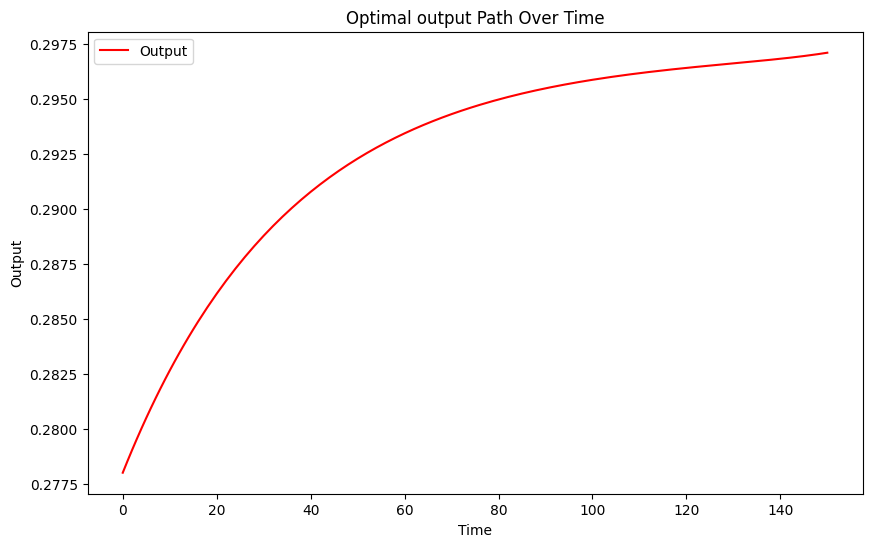

In [ ]:
# plot y 
time = np.arange(0, t+1)
plt.figure(figsize=(10, 6))
plt.plot(time, l_sq, color='red', label='Output')
plt.xlabel('Time')
plt.ylabel('Output')
plt.title('Optimal output Path Over Time')
plt.legend()
plt.show()

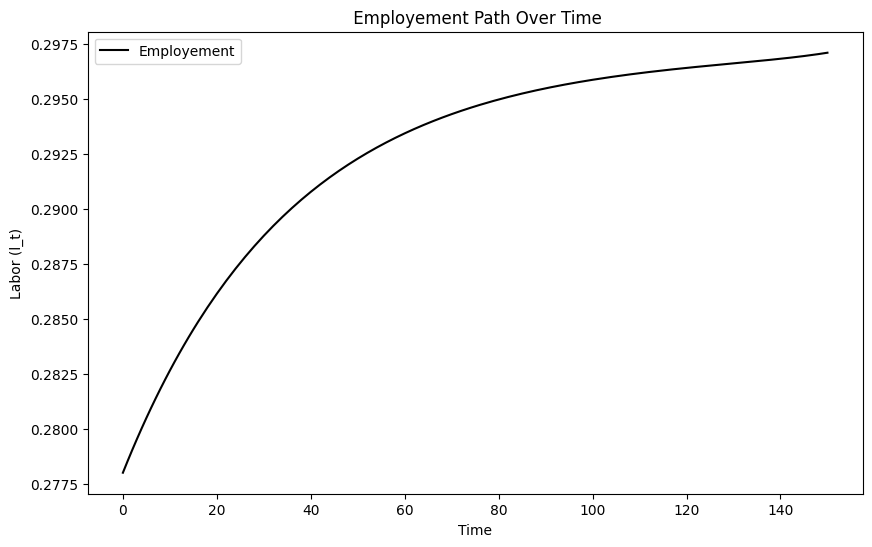

In [ ]:
# plot the employment
time = np.arange(0, t+1)
plt.figure(figsize=(10, 6))
plt.plot(time, l_sq, color='black', label='Employement')
plt.xlabel('Time')
plt.ylabel('Labor (l_t)')
plt.title(' Employement Path Over Time')
plt.legend()
plt.show()

In [ ]:
#def investment X
def investment_function(k_sq, delta):
    t = len(k_sq) - 1
    x_sq = np.zeros_like(k_sq)
    for i in range(t):
        x_sq[i] = k_sq[i+1] - (1-delta)*k_sq[i]
    return x_sq
x_sq = investment_function(k_sq, delta)
x_sq

array([0.05542666, 0.05570392, 0.05597422, 0.05623773, 0.05649459,
       0.05674496, 0.05698901, 0.05722687, 0.0574587 , 0.05768465,
       0.05790484, 0.05811943, 0.05832854, 0.05853231, 0.05873087,
       0.05892434, 0.05911286, 0.05929653, 0.05947549, 0.05964984,
       0.0598197 , 0.05998519, 0.0601464 , 0.06030346, 0.06045645,
       0.06060548, 0.06075066, 0.06089207, 0.06102981, 0.06116398,
       0.06129466, 0.06142194, 0.06154591, 0.06166666, 0.06178426,
       0.06189879, 0.06201033, 0.06211897, 0.06222476, 0.06232779,
       0.06242813, 0.06252584, 0.06262099, 0.06271365, 0.06280388,
       0.06289175, 0.06297731, 0.06306063, 0.06314176, 0.06322076,
       0.06329769, 0.06337259, 0.06344553, 0.06351655, 0.0635857 ,
       0.06365303, 0.06371859, 0.06378242, 0.06384458, 0.0639051 ,
       0.06396402, 0.0640214 , 0.06407726, 0.06413166, 0.06418462,
       0.06423619, 0.0642864 , 0.06433529, 0.06438289, 0.06442924,
       0.06447438, 0.06451833, 0.06456112, 0.0646028 , 0.06464

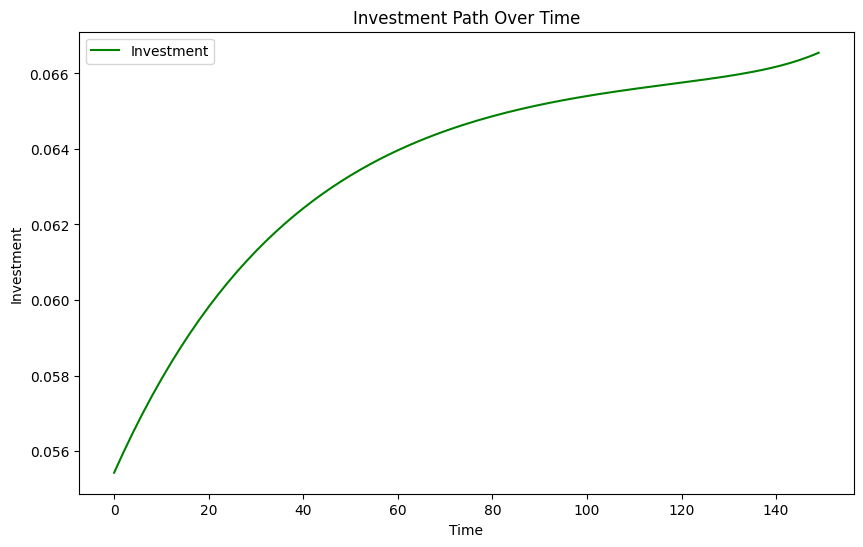

In [ ]:
# plot the employment
time = np.arange(0, t)
plt.figure(figsize=(10, 6))
plt.plot(time, x_sq[:-1], color='green', label='Investment')
plt.xlabel('Time')
plt.ylabel('Investment')
plt.title('Investment Path Over Time')
plt.legend()
plt.show()

In [ ]:
# def the consumption path
def consumption_function(A, l_sq, k_sq, theta, delta):
    c_sq = np.zeros_like(k_sq)
    for i in range(t):
        c_sq[i] = A*(k_sq[i])**(theta)*(l_sq[i])**(1-theta) + (1-delta)*k_sq[i] - k_sq[i+1]
    return c_sq
c_sq = consumption_function(A, l_sq, k_sq,theta, delta)

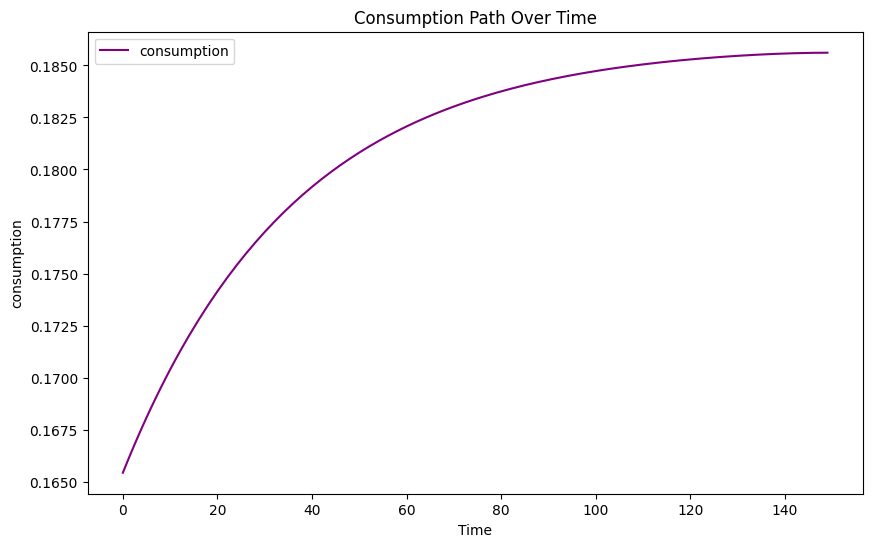

In [ ]:
# plot the consumption
time = np.arange(0, t)
plt.figure(figsize=(10, 6))
plt.plot(time, c_sq[:-1], color='purple', label='consumption')
plt.xlabel('Time')
plt.ylabel('consumption')
plt.title('Consumption Path Over Time')
plt.legend()
plt.show()

In [ ]:
# def the interest rate path
def interest_function(A, l_sq, k_sq, theta, delta):
    r_sq = np.zeros_like(k_sq)
    for i in range(t):
        r_sq[i] = A*theta*(k_sq[i])**(theta-1)*(l_sq[i])**(1-theta) - delta
    return r_sq
r_sq = interest_function(A, l_sq, k_sq,theta, delta)
r_sq

array([0.02352177, 0.02310966, 0.0227118 , 0.02232759, 0.02195647,
       0.02159792, 0.02125143, 0.02091653, 0.02059277, 0.0202797 ,
       0.01997692, 0.01968404, 0.01940067, 0.01912647, 0.01886109,
       0.0186042 , 0.0183555 , 0.01811468, 0.01788146, 0.01765557,
       0.01743674, 0.01722474, 0.01701931, 0.01682023, 0.01662728,
       0.01644024, 0.01625892, 0.01608312, 0.01591265, 0.01574733,
       0.015587  , 0.01543148, 0.01528062, 0.01513426, 0.01499226,
       0.01485447, 0.01472076, 0.014591  , 0.01446505, 0.01434281,
       0.01422414, 0.01410894, 0.01399709, 0.0138885 , 0.01378305,
       0.01368066, 0.01358122, 0.01348465, 0.01339086, 0.01329976,
       0.01321127, 0.01312531, 0.0130418 , 0.01296067, 0.01288185,
       0.01280526, 0.01273085, 0.01265854, 0.01258827, 0.01251998,
       0.01245362, 0.01238912, 0.01232644, 0.01226551, 0.01220629,
       0.01214872, 0.01209276, 0.01203836, 0.01198547, 0.01193406,
       0.01188407, 0.01183547, 0.01178821, 0.01174226, 0.01169

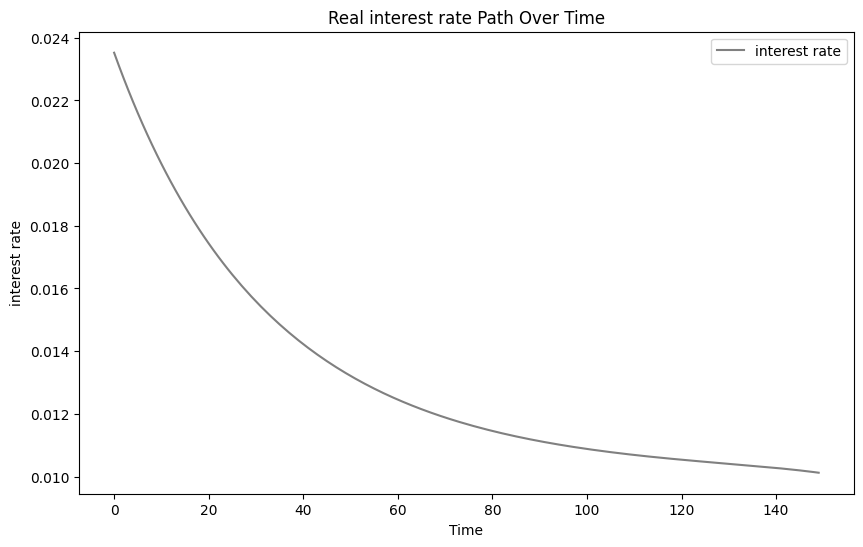

In [ ]:
# plot the interest rate
time = np.arange(0, t)
plt.figure(figsize=(10, 6))
plt.plot(time, r_sq[:-1], color='grey', label='interest rate')
plt.xlabel('Time')
plt.ylabel('interest rate')
plt.title('Real interest rate Path Over Time')
plt.legend()
plt.show()

In [ ]:
# check A_t
A_t = A_sq_function(t1)
A_t

[0.6,
 np.float64(0.555),
 np.float64(0.5334314575050763),
 np.float64(0.5222434359699062),
 np.float64(0.5172434359699062),
 np.float64(0.5164663483299096),
 np.float64(0.5188064850928006),
 np.float64(0.5235693272520624),
 np.float64(0.5302850560046005),
 np.float64(0.5386183893379339),
 np.float64(0.5483201680565869),
 np.float64(0.5591992604903658),
 np.float64(0.5711052497227809),
 np.float64(0.5839172418737717),
 0.6,
 0.6,
 0.6,
 0.6,
 0.6,
 0.6,
 0.6,
 0.6,
 0.6,
 0.6,
 0.6,
 0.6,
 0.6,
 0.6,
 0.6,
 0.6,
 0.6,
 0.6,
 0.6,
 0.6,
 0.6,
 0.6,
 0.6,
 0.6,
 0.6,
 0.6,
 0.6,
 0.6,
 0.6,
 0.6,
 0.6,
 0.6,
 0.6,
 0.6,
 0.6,
 0.6,
 0.6]

In [ ]:
# as above, let us define all functions needed for shooting method
def labor(A_t, k_t, theta):
    return((A * k_t**(theta) * (1-theta)/2) ** (1/(1+theta)))

def capital_next(k_t, c_t, A_t, theta, delta):
    l = labor(A_t, k_t, theta)
    return A_t * k_t**theta * l**(1 - theta) + k_t * (1 - delta) - c_t

def consumption_next(k_t, k_tp1, c_t, A_t, theta, delta, sigma, beta):
    MU_0 = (c_t - labor(A_t, k_t, theta)**2)**(-sigma)
    c_tp1 = (MU_0 / (beta * (A_t * theta * k_tp1**(theta - 1) * labor(A_t, k_t, theta)**(1 - theta) + (1 - delta))))**(-1/sigma) + labor(A_t, k_t, theta)**2
    return c_tp1

In [ ]:
def consumption_path(c0, t1, A_t, theta, delta, sigma, beta):
    k = np.zeros(t1 + 1)
    c = np.zeros(t1 + 1)
    k[0] = k_0
    c[0] = c0
    for i in range(t1):
        k[i + 1] = capital_next(k[i], c[i], A_t[i], theta, delta)
        if k[i + 1] <= 0:
            k[i + 1] = 0
            break
        c[i + 1] = consumption_next(k[i], k[i + 1], c[i], A_t[i], theta, delta, sigma, beta)
    result = np.vstack((k, c)).T # transpose it to make the row represens different time periods and column 0 is k , columm 1 is c
    return result

In [ ]:
k_max = 2
def css(k_0, theta, delta):
    l = labor(A_t[0], k_0, theta)
    return A_t[0] * k_0**theta * l**(1 - theta) - delta * k_0

k_gold = (delta * (1 + theta) / (2 * theta) * (1 / A_t[0]))**((1 + theta) / (theta - 1)) * A_t[0] * (1 - theta) / 2
c_max = css(k_gold, theta, delta)
c_max

0.22052779027015987

In [ ]:
def optimal_path(t1, c_max, A_t, k_ss, theta, delta, sigma, beta, c0_min=0.001):
    c0_max = c_max
    iterations = 0
    while c0_max - c0_min > 1e-16:
        c0 = (c0_min + c0_max) / 2
        simulation = consumption_path(c0, t1, A_t, theta, delta, sigma, beta)
        if simulation[-1, 0] <= k_ss:
            c0_max = c0
        else:
            c0_min = c0
        iterations += 1
    return simulation

In [ ]:
k_sq2 = optimal_path(t1,c_max,A_t,k_ss,theta, delta, sigma, beta,c0_min=0.001)[:,0]
k_sq2

array([0.70846122, 0.72672313, 0.72911663, 0.72342412, 0.71317081,
       0.70046971, 0.68674857, 0.67304118, 0.66013507, 0.64865897,
       0.6391407 , 0.63204896, 0.62782579, 0.62691338, 0.62977711,
       0.63778485, 0.64568413, 0.65348145, 0.6611839 , 0.66879907,
       0.67633518, 0.68380104, 0.69120617, 0.69856074, 0.70587573,
       0.71316287, 0.72043477, 0.72770497, 0.73498794, 0.74229922,
       0.74965542, 0.75707437, 0.76457509, 0.77217796, 0.77990472,
       0.7877786 , 0.79582438, 0.80406844, 0.81253887, 0.82126552,
       0.83028008, 0.8396161 , 0.84930908, 0.85939649, 0.86991779,
       0.88091442, 0.89242983, 0.90450942, 0.91720046, 0.93055205,
       0.94461496])

In [ ]:
c_sq2 = optimal_path(t1,c_max,A_t,k_ss,theta, delta, sigma, beta,c0_min=0.001)[:,1]
c_sq2

array([0.15300095, 0.1534407 , 0.15362788, 0.15371052, 0.15375539,
       0.15380258, 0.15387956, 0.15400638, 0.15419804, 0.15446556,
       0.15481642, 0.15525469, 0.15578105, 0.15639257, 0.15708269,
       0.157854  , 0.15860172, 0.15932634, 0.16002828, 0.16070796,
       0.16136575, 0.162002  , 0.162617  , 0.16321104, 0.16378434,
       0.16433711, 0.1648695 , 0.16538164, 0.16587362, 0.16634547,
       0.16679721, 0.1672288 , 0.16764016, 0.16803118, 0.16840169,
       0.16875149, 0.16908033, 0.16938795, 0.169674  , 0.16993813,
       0.17017995, 0.17039902, 0.17059489, 0.17076706, 0.17091505,
       0.17103831, 0.17113635, 0.17120861, 0.1712546 , 0.17127382,
       0.1712658 ])

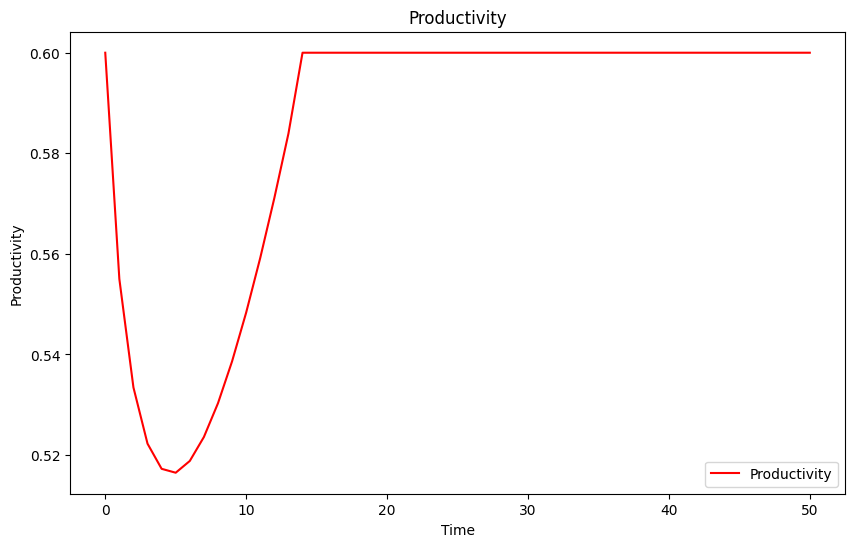

In [ ]:
# Plot the productivity
time = np.arange(0, t1 + 1)
plt.figure(figsize=(10, 6))
plt.plot(time, A_t, color='red', label='Productivity')
plt.xlabel('Time')
plt.ylabel('Productivity')
plt.title('Productivity')
plt.legend()
plt.show()

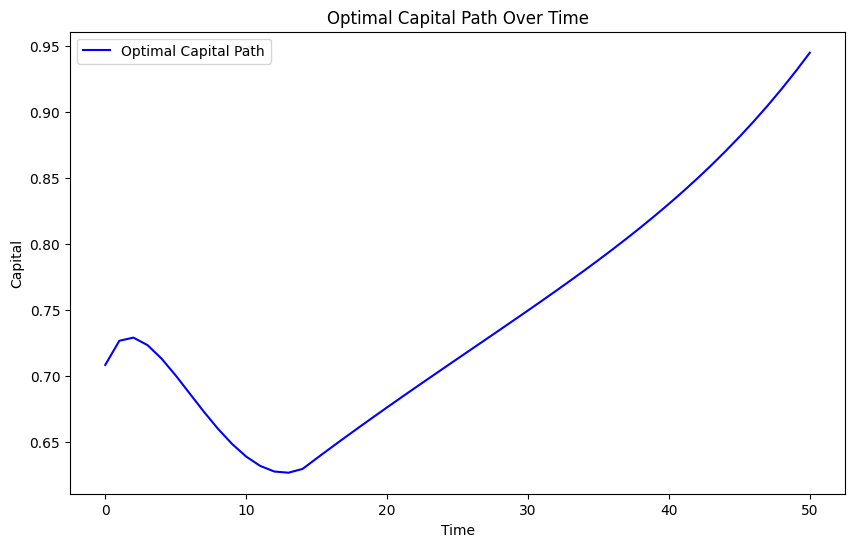

In [ ]:
# Plot the optimal capital path
time = np.arange(0, t1 + 1)
plt.figure(figsize=(10, 6))
plt.plot(time, k_sq2, color='blue', label='Optimal Capital Path')
plt.xlabel('Time')
plt.ylabel('Capital')
plt.title('Optimal Capital Path Over Time')
plt.legend()
plt.show()

In [ ]:
l_sq2 = labor(A_t, k_sq2, theta)
l_sq2

array([0.27802752, 0.27966522, 0.27987751, 0.27937173, 0.27845295,
       0.27730062, 0.27603756, 0.27475622, 0.2735313 , 0.27242653,
       0.27149878, 0.2708006 , 0.27038197, 0.27029124, 0.27057567,
       0.27136576, 0.2721377 , 0.27289259, 0.27363153, 0.27435561,
       0.27506595, 0.2757637 , 0.27645   , 0.27712605, 0.27779304,
       0.27845223, 0.2791049 , 0.27975236, 0.280396  , 0.28103722,
       0.2816775 , 0.28231836, 0.28296139, 0.28360825, 0.28426065,
       0.28492037, 0.28558928, 0.28626929, 0.28696242, 0.28767073,
       0.28839635, 0.28914148, 0.28990839, 0.2906994 , 0.29151685,
       0.29236314, 0.2932407 , 0.29415194, 0.29509927, 0.29608509,
       0.29711173])

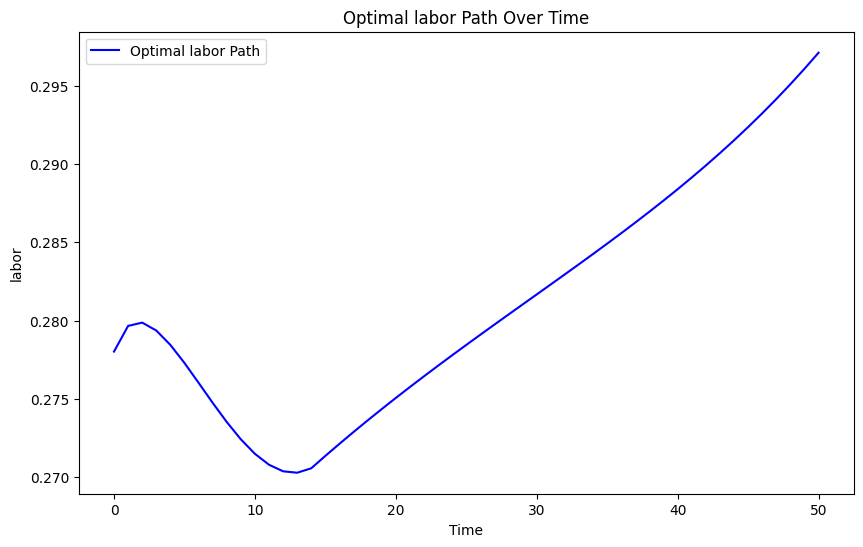

In [ ]:
# Plot the optimal labor path
time = np.arange(0, t1 + 1)
plt.figure(figsize=(10, 6))
plt.plot(time, l_sq2, color='blue', label='Optimal labor Path')
plt.xlabel('Time')
plt.ylabel('labor')
plt.title('Optimal labor Path Over Time')
plt.legend()
plt.show()

In [ ]:
#def investment x
def investment_function(k_sq2, delta):
    t = len(k_sq2) - 1
    x_sq2 = np.zeros_like(k_sq2)
    for i in range(t1):
        x_sq2[i] = k_sq2[i+1] - (1-delta)*k_sq2[i]
    return x_sq2
x_sq2 = investment_function(k_sq2, delta)
x_sq2

array([0.0678542 , 0.05326412, 0.04534566, 0.04038638, 0.03722085,
       0.03531175, 0.03436501, 0.03420677, 0.03473336, 0.03588786,
       0.0376481 , 0.04002026, 0.0430354 , 0.04674766, 0.05209214,
       0.05254421, 0.05299522, 0.05344614, 0.05389805, 0.05435204,
       0.05480933, 0.0552712 , 0.05573901, 0.05621423, 0.05669844,
       0.05719331, 0.05770063, 0.05822232, 0.05876043, 0.05931715,
       0.05989482, 0.06049593, 0.06112312, 0.06177922, 0.06246721,
       0.06319028, 0.06395177, 0.06475522, 0.06560438, 0.06650314,
       0.06745563, 0.06846611, 0.06953904, 0.07067905, 0.07189088,
       0.07317942, 0.07454967, 0.0760067 , 0.07755562, 0.07920155,
       0.        ])

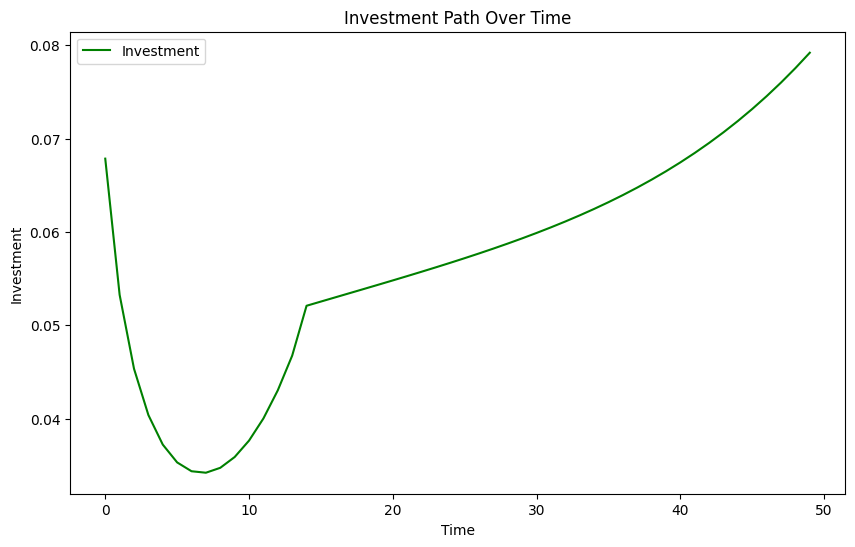

In [ ]:
# plot the investment
time = np.arange(0, t1)
plt.figure(figsize=(10, 6))
plt.plot(time, x_sq2[:-1], color='green', label='Investment')
plt.xlabel('Time')
plt.ylabel('Investment')
plt.title('Investment Path Over Time')
plt.legend()
plt.show()

# 2 (b) t = 1 to t = 15

In [ ]:
# def output y 
def output_function(A_t, l_sq2, k_sq2, theta):
    y_sq2 = np.zeros_like(k_sq2)
    for i in range(t1):
        y_sq2[i] = A_t[i] * (k_sq2[i])**(theta) * (l_sq2[i])**(1-theta)
    return y_sq2

y_sq2 = output_function(A_t, k_sq2, l_sq2, theta)
y_sq2

array([0.32106935, 0.30286062, 0.29182798, 0.28398985, 0.2781993 ,
       0.273968  , 0.27105304, 0.26933178, 0.2687537 , 0.26931931,
       0.27107041, 0.27408608, 0.27848184, 0.28441085, 0.2932707 ,
       0.29613498, 0.29895233, 0.30172553, 0.3044575 , 0.30715131,
       0.30981018, 0.31243754, 0.31503699, 0.31761235, 0.32016764,
       0.32270713, 0.32523536, 0.32775711, 0.33027747, 0.33280183,
       0.33533592, 0.33788582, 0.34045797, 0.34305921, 0.3456968 ,
       0.3483784 , 0.35111217, 0.3539067 , 0.35677109, 0.35971493,
       0.36274832, 0.36588188, 0.36912676, 0.37249461, 0.37599762,
       0.37964846, 0.38346027, 0.38744667, 0.39162163, 0.39599954,
       0.        ])

In [ ]:
# def the interest rate path
def interest_function(A_t, l_sq2, k_sq2, theta, delta):
    r_sq2 = np.zeros_like(k_sq2)
    for i in range(t1+1):
        r_sq2[i] = A*theta*(k_sq2[i])**(theta-1)*(l_sq2[i])**(1-theta) - delta
    return r_sq2
r_sq2 = interest_function(A_t, l_sq2, k_sq2,theta, delta)
r_sq2

array([0.02352177, 0.02224889, 0.0220857 , 0.02247517, 0.02318871,
       0.02409478, 0.02510247, 0.02614056, 0.02714813, 0.02806987,
       0.0288536 , 0.0294493 , 0.02980895, 0.02988715, 0.02964232,
       0.0289667 , 0.0283129 , 0.0276795 , 0.02706512, 0.02646843,
       0.02588814, 0.02532299, 0.02477173, 0.02423315, 0.02370606,
       0.02318927, 0.02268159, 0.02218185, 0.02168887, 0.02120148,
       0.02071849, 0.02023872, 0.01976095, 0.01928398, 0.01880658,
       0.01832752, 0.01784555, 0.01735942, 0.01686786, 0.01636961,
       0.0158634 , 0.01534798, 0.0148221 , 0.01428453, 0.01373409,
       0.01316962, 0.01259003, 0.01199428, 0.01138141, 0.01075057,
       0.01010101])

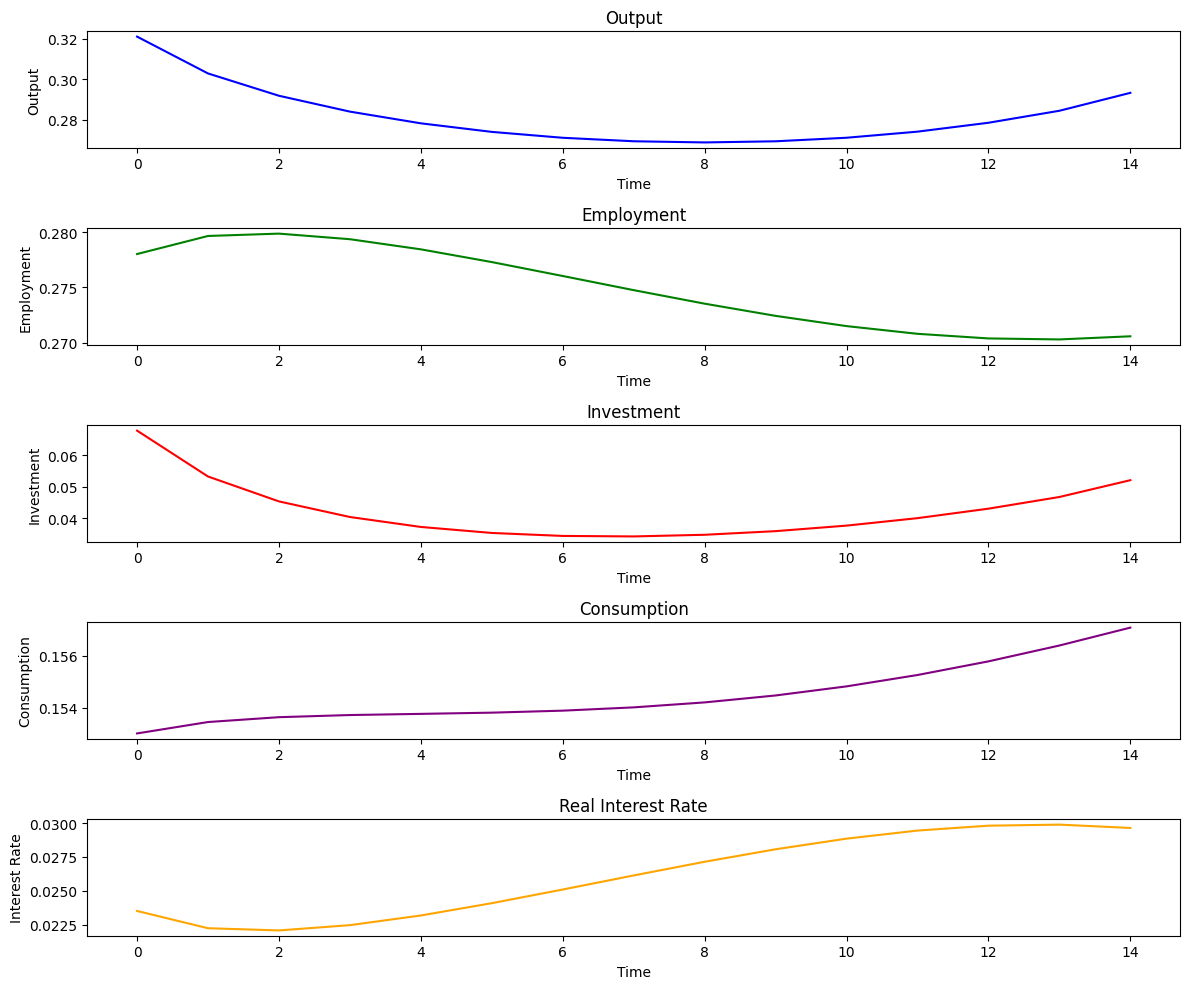

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# define x-array
time_range = np.arange(0, 15)

# def y - array
y_sq2_plot = y_sq2[:15]
l_sq2_plot = l_sq2[:15]
x_sq2_plot = x_sq2[:15]
c_sq2_plot = c_sq2[:15]
r_sq2_plot = r_sq2[:15]

# put the figure together
plt.figure(figsize=(12, 10))

# output
plt.subplot(5, 1, 1)
plt.plot(time_range, y_sq2_plot, color='blue')
plt.title('Output')
plt.xlabel('Time')
plt.ylabel('Output')

# employement
plt.subplot(5, 1, 2)
plt.plot(time_range, l_sq2_plot, color='green')
plt.title('Employment')
plt.xlabel('Time')
plt.ylabel('Employment')

# investment
plt.subplot(5, 1, 3)
plt.plot(time_range, x_sq2_plot, color='red')
plt.title('Investment')
plt.xlabel('Time')
plt.ylabel('Investment')

# consumption
plt.subplot(5, 1, 4)
plt.plot(time_range, c_sq2_plot, color='purple')
plt.title('Consumption')
plt.xlabel('Time')
plt.ylabel('Consumption')

# real interest rate
plt.subplot(5, 1, 5)
plt.plot(time_range, r_sq2_plot, color='orange')
plt.title('Real Interest Rate')
plt.xlabel('Time')
plt.ylabel('Interest Rate')
plt.tight_layout()

plt.show()


***Explanation:***

# 2 (c)

In [ ]:
# import data: here since the world bank only gives real interest rate at a yearly frenquency, I used one year real interest rate from Fred instead
import pandas as pd
real_gdp = pd.read_excel('/Users/astro/Desktop/GDPC1.xls')

In [ ]:
real_gdp

,observation_date,GDPC1
0,1947-01-01,2182.681
1,1947-04-01,2176.892
2,1947-07-01,2172.432
3,1947-10-01,2206.452
4,1948-01-01,2239.682
...,...,...
288,2019-01-01,20415.150
289,2019-04-01,20584.528
290,2019-07-01,20817.581
291,2019-10-01,20951.088


In [ ]:
real_gdp.set_index(pd.period_range('1947Q1', '2020Q1', freq='Q'), inplace = True)
real_gdp

,observation_date,GDPC1
1947Q1,1947-01-01,2182.681
1947Q2,1947-04-01,2176.892
1947Q3,1947-07-01,2172.432
1947Q4,1947-10-01,2206.452
1948Q1,1948-01-01,2239.682
...,...,...
2019Q1,2019-01-01,20415.150
2019Q2,2019-04-01,20584.528
2019Q3,2019-07-01,20817.581
2019Q4,2019-10-01,20951.088


In [ ]:
#let us do Hodrick–Prescott time series filter for real gdp
from statsmodels.tsa.filters.hp_filter import hpfilter
log_rgdp_cycle, log_rgdp_trend = hpfilter(np.log(real_gdp['GDPC1']), lamb=1600)
log_rgdp_cycle

1947Q1    0.025307
1947Q2    0.012142
1947Q3   -0.000435
1947Q4    0.004538
1948Q1    0.008859
            ...   
2019Q1   -0.001487
2019Q2    0.000651
2019Q3    0.005799
2019Q4    0.006096
2020Q1   -0.013715
Freq: Q-DEC, Name: GDPC1_cycle, Length: 293, dtype: float64

Text(0, 0.5, 'GDP Cycle')

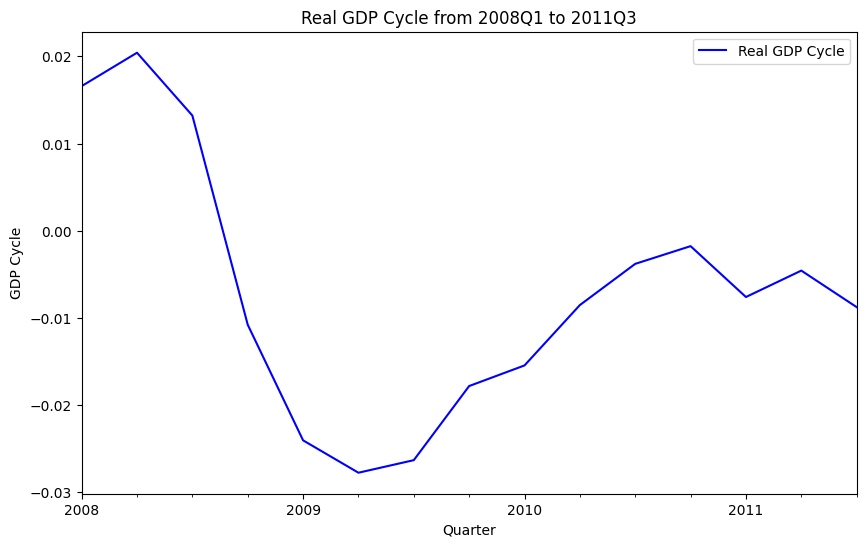

In [ ]:
dtrend_gdp = log_rgdp_cycle['2008Q1':'2011Q3']
plt.figure(figsize=(10, 6))
dtrend_gdp.plot(label='Real GDP Cycle', color='b')
plt.legend()
plt.title('Real GDP Cycle from 2008Q1 to 2011Q3')
plt.xlabel('Quarter')
plt.ylabel('GDP Cycle')

In [ ]:
emp = pd.read_excel('/Users/astro/Desktop/PAYEMS.xls')
emp

,observation_date,PAYEMS
0,1947-01-01,43535
1,1947-02-01,43557
2,1947-03-01,43607
3,1947-04-01,43499
4,1947-05-01,43638
...,...,...
872,2019-09-01,151358
873,2019-10-01,151458
874,2019-11-01,151666
875,2019-12-01,151792


In [ ]:
# convert monthly to quarterly
emp['Date'] = pd.to_datetime(emp['observation_date'])
quarterly_months = [1, 4, 7, 10]
quarterly_emp = emp[emp['observation_date'].dt.month.isin(quarterly_months)]
quarterly_emp
quarterly_emp.set_index(pd.period_range('1947Q1', '2020Q1', freq='Q'), inplace = True)
quarterly_emp

,observation_date,PAYEMS,Date
1947Q1,1947-01-01,43535,1947-01-01
1947Q2,1947-04-01,43499,1947-04-01
1947Q3,1947-07-01,43743,1947-07-01
1947Q4,1947-10-01,44411,1947-10-01
1948Q1,1948-01-01,44679,1948-01-01
...,...,...,...
2019Q1,2019-01-01,150062,2019-01-01
2019Q2,2019-04-01,150602,2019-04-01
2019Q3,2019-07-01,150934,2019-07-01
2019Q4,2019-10-01,151458,2019-10-01


In [ ]:
#let us do Hodrick–Prescott time series filter for employment
from statsmodels.tsa.filters.hp_filter import hpfilter
log_quarterly_emp_cycle, log_quarterly_emp_trend = hpfilter(np.log(quarterly_emp['PAYEMS']), lamb=1600)
log_quarterly_emp_cycle


1947Q1    0.006531
1947Q2    0.001664
1947Q3    0.003213
1947Q4    0.014316
1948Q1    0.016263
            ...   
2019Q1   -0.000272
2019Q2   -0.000740
2019Q3   -0.002585
2019Q4   -0.003161
2020Q1   -0.003333
Freq: Q-DEC, Name: PAYEMS_cycle, Length: 293, dtype: float64

Text(0, 0.5, 'Employment Cycle')

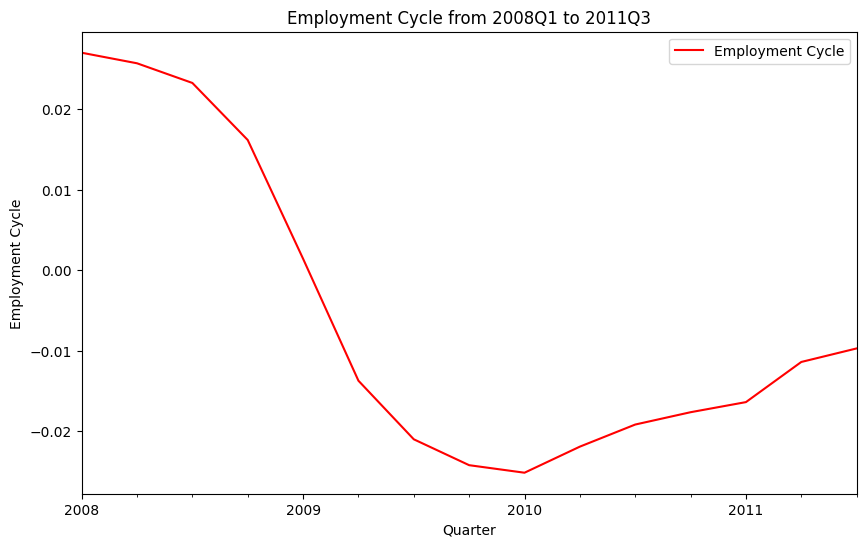

In [ ]:
dtrend_emp = log_quarterly_emp_cycle['2008Q1':'2011Q3']
plt.figure(figsize=(10, 6))
dtrend_emp.plot(label='Employment Cycle', color='r')
plt.legend()
plt.title('Employment Cycle from 2008Q1 to 2011Q3')
plt.xlabel('Quarter')
plt.ylabel('Employment Cycle')

In [ ]:
# for Real Investment
real_invest = pd.read_excel('/Users/astro/Desktop/GPDIC1.xls')
real_invest

real_invest.set_index(pd.period_range('1947Q1', '2020Q1', freq='Q'), inplace = True)
real_invest

# let us do Hodrick–Prescott time series filter for employment
from statsmodels.tsa.filters.hp_filter import hpfilter
log_real_invest_cycle, log_real_invest_trend = hpfilter(np.log(real_invest['GPDIC1']), lamb=1600)
log_real_invest_cycle


1947Q1   -0.000629
1947Q2   -0.093910
1947Q3   -0.137365
1947Q4    0.026000
1948Q1    0.110347
            ...   
2019Q1    0.007445
2019Q2    0.005849
2019Q3    0.007830
2019Q4   -0.012449
2020Q1   -0.046828
Freq: Q-DEC, Name: GPDIC1_cycle, Length: 293, dtype: float64

Text(0, 0.5, 'Real Investment Cycle')

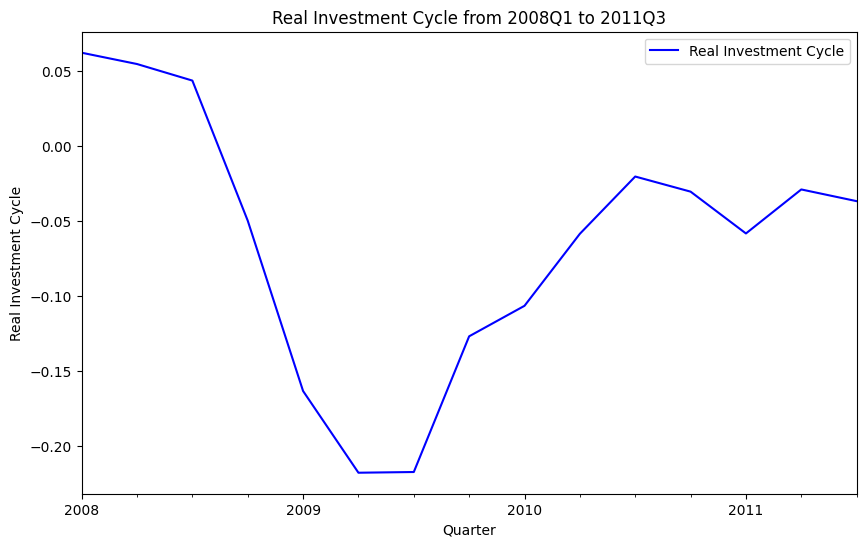

In [ ]:
dtrend_real_invest = log_real_invest_cycle['2008Q1':'2011Q3']
plt.figure(figsize=(10, 6))
dtrend_real_invest.plot(label='Real Investment Cycle', color='b')
plt.legend()
plt.title('Real Investment Cycle from 2008Q1 to 2011Q3')
plt.xlabel('Quarter')
plt.ylabel('Real Investment Cycle')

In [ ]:
# for Real Consumption
real_c = pd.read_excel('/Users/astro/Desktop/PCECC96.xls')
real_c

real_c.set_index(pd.period_range('1947Q1', '2020Q1', freq='Q'), inplace = True)
real_c

# let us do Hodrick–Prescott time series filter for Consumption
from statsmodels.tsa.filters.hp_filter import hpfilter
log_real_c_cycle, log_real_c_trend = hpfilter(np.log(real_c['PCECC96']), lamb=1600)
log_real_c_cycle
dtrend_c = log_real_c_cycle['2008Q1':'2011Q3']

In [ ]:
# for interest rate
real_r = pd.read_excel('/Users/astro/Desktop/REAINTRATREARAT1YE.xls')
real_r
# convert monthly to quarterly
real_r['Date'] = pd.to_datetime(emp['observation_date'])
quarterly_months = [1, 4, 7, 10]
quarterly_real_r = real_r[real_r['observation_date'].dt.month.isin(quarterly_months)]
quarterly_real_r.set_index(pd.period_range('1982Q1', '2024Q1', freq='Q'), inplace = True)
dtrend_real_r = quarterly_real_r['REAINTRATREARAT1YE'].loc['2008Q1':'2011Q3']
dtrend_real_r

2008Q1    1.120558
2008Q2    0.065744
2008Q3   -0.817282
2008Q4    1.194783
2009Q1    2.027035
2009Q2    0.069384
2009Q3   -0.103062
2009Q4   -0.809836
2010Q1   -0.812151
2010Q2   -0.444251
2010Q3   -0.070046
2010Q4   -1.002238
2011Q1   -1.108981
2011Q2   -1.468782
2011Q3   -2.566039
Freq: Q-DEC, Name: REAINTRATREARAT1YE, dtype: float64

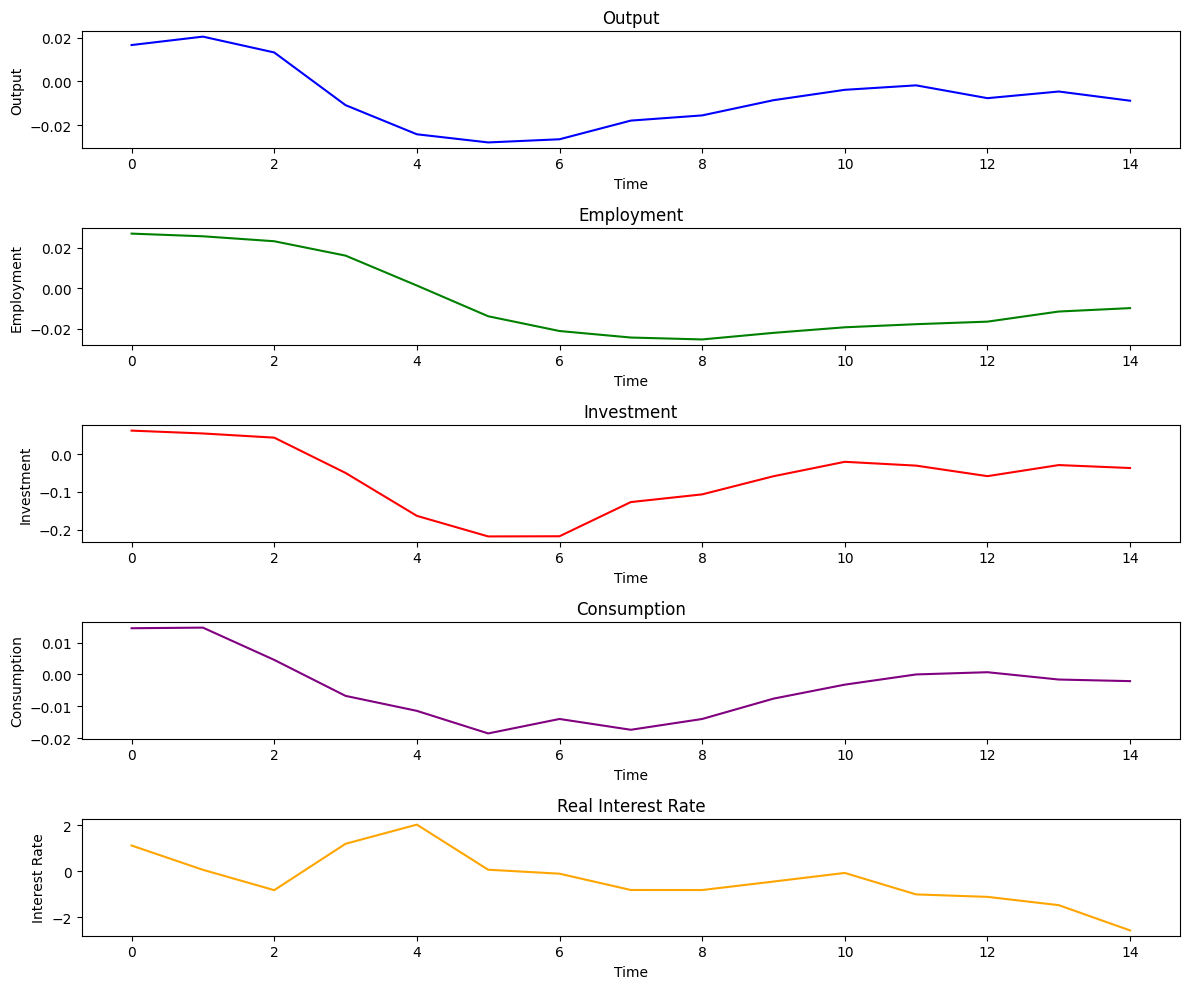

In [ ]:
# define x-array
time_range = np.arange(0, 15)

# def y - array
y_sq3_plot = dtrend_gdp
l_sq3_plot = dtrend_emp
x_sq3_plot = dtrend_real_invest
c_sq3_plot = dtrend_c
r_sq3_plot = dtrend_real_r

# put the figure together
plt.figure(figsize=(12, 10))

# gdp
plt.subplot(5, 1, 1)
plt.plot(time_range, y_sq3_plot, color='blue')
plt.title('Output')
plt.xlabel('Time')
plt.ylabel('Output')

# employement
plt.subplot(5, 1, 2)
plt.plot(time_range, l_sq3_plot, color='green')
plt.title('Employment')
plt.xlabel('Time')
plt.ylabel('Employment')

# investment
plt.subplot(5, 1, 3)
plt.plot(time_range, x_sq3_plot, color='red')
plt.title('Investment')
plt.xlabel('Time')
plt.ylabel('Investment')

# consumption
plt.subplot(5, 1, 4)
plt.plot(time_range, c_sq3_plot, color='purple')
plt.title('Consumption')
plt.xlabel('Time')
plt.ylabel('Consumption')

# real interest rate
plt.subplot(5, 1, 5)
plt.plot(time_range, r_sq3_plot, color='orange')
plt.title('Real Interest Rate')
plt.xlabel('Time')
plt.ylabel('Interest Rate')
plt.tight_layout()

plt.show()